In [ ]:
pip install torch opendatasets

Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU

In [ ]:
%load_ext cudf.pandas

,Registration State,Violation Description,count
0,CA,Double Parking,50270
1,NJ,Expired Meter,50255
2,NY,Double Parking,50332
3,TX,Double Parking,50160


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import opendatasets as od
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import timm
from timm.layers.helpers import to_2tuple

# od.download("https://www.kaggle.com/datasets/mohamedboua/breast-cancer-data-interpolation")


ModuleNotFoundError: No module named 'opendatasets'

In [ ]:

print(f"Original Labels: {np.unique(y_train)}")
y_train_binary = np.copy(y_train)
y_train_binary[:] = 1

safe_mask = (y_train == 0) | (y_train == 1) | (y_train == 2)
y_train_binary[safe_mask] = 0

print(f"Binary Labels Created. Counts:")
unique, counts = np.unique(y_train_binary, return_counts=True)
print(dict(zip(["Safe (0)", "Unsafe (1)"], counts)))


print(f"Original Labels: {np.unique(y_test)}")
y_test_binary = np.copy(y_test)
y_test_binary[:] = 1

safe_mask = (y_test == 0) | (y_test == 1) | (y_test == 2)
y_test_binary[safe_mask] = 0

print(f"Binary Labels Created. Counts:")
unique, counts = np.unique(y_test_binary, return_counts=True)
print(dict(zip(["Safe (0)", "Unsafe (1)"], counts)))




Original Labels: [0 1 2 3 4 5 6]
Binary Labels Created. Counts:
{'Safe (0)': np.int64(1963), 'Unsafe (1)': np.int64(4957)}
Original Labels: [0 1 2 3 4 5 6]
Binary Labels Created. Counts:
{'Safe (0)': np.int64(491), 'Unsafe (1)': np.int64(1240)}


In [ ]:
y_train_binary

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
import numpy as np

# ---------- TRAIN ----------
print(f"Original Labels (train): {np.unique(y_train)}")

y_train_3 = np.copy(y_train)

# 0: benign / low-risk (0,1,2)
benign_mask   = (y_train == 0) | (y_train == 1) | (y_train == 2)
# 1: high-risk / precursor (3,4)
highrisk_mask = (y_train == 3) | (y_train == 4)
# 2: carcinoma (5,6)
carc_mask     = (y_train == 5) | (y_train == 6)

y_train_3[benign_mask]   = 0
y_train_3[highrisk_mask] = 1
y_train_3[carc_mask]     = 2

print("3-class Labels Created (train). Counts:")
unique, counts = np.unique(y_train_3, return_counts=True)
print(dict(zip(["Benign (0)", "HighRisk (1)", "Carcinoma (2)"], counts)))

# ---------- TEST ----------
print(f"\nOriginal Labels (test): {np.unique(y_test)}")

y_test_3 = np.copy(y_test)

benign_mask   = (y_test == 0) | (y_test == 1) | (y_test == 2)
highrisk_mask = (y_test == 3) | (y_test == 4)
carc_mask     = (y_test == 5) | (y_test == 6)

y_test_3[benign_mask]   = 0
y_test_3[highrisk_mask] = 1
y_test_3[carc_mask]     = 2

print("3-class Labels Created (test). Counts:")
unique, counts = np.unique(y_test_3, return_counts=True)
print(dict(zip(["Benign (0)", "HighRisk (1)", "Carcinoma (2)"], counts)))


Original Labels (train): [0 1 2 3 4 5 6]
3-class Labels Created (train). Counts:
{'Benign (0)': np.int64(1963), 'HighRisk (1)': np.int64(2630), 'Carcinoma (2)': np.int64(2327)}

Original Labels (test): [0 1 2 3 4 5 6]
3-class Labels Created (test). Counts:
{'Benign (0)': np.int64(491), 'HighRisk (1)': np.int64(658), 'Carcinoma (2)': np.int64(582)}


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=400,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    class_weight='balanced',
    scale_pos_weight=0.4
)

print("Training Binary XGBoost...")
model.fit(X_train, y_train_binary)

print("Predicting...")
preds = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test_binary, preds)}")
print("\nClassification Report:")
print(classification_report(y_test_binary, preds, target_names=["Safe", "Unsafe"]))


Training Binary XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:07:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Predicting...
Accuracy: 0.6722338204592901

Classification Report:
              precision    recall  f1-score   support

        Safe       0.36      0.22      0.27       270
      Unsafe       0.73      0.85      0.79       688

    accuracy                           0.67       958
   macro avg       0.55      0.53      0.53       958
weighted avg       0.63      0.67      0.64       958



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(
    objective='multi:softprob',  # Probabilities for 7 classes
    num_class=3,                 # Explicitly state class count
    n_estimators=100,            # Number of trees
    learning_rate=0.1,
    max_depth=5,
    class_weight='balanced'
)

model.fit(X_train, y_train_3)
preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_3, preds)}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:20:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8393991912189486


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Standard industry booster

# ... (Previous code: Extraction and Splitting X_train, y_train) ...

print("Initializing Ensemble Models...")

# 1. Random Forest (Your current model)
# Good for robustness and handling noise
clf_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# 2. XGBoost (The "Champion" of tabular data)
# Usually achieves higher accuracy than RF on embeddings
clf_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=0.4
)

# 3. Support Vector Machine (The "Geometer")
# Great for high-dim (768) spaces.
# probability=True is REQUIRED for Soft Voting.
clf_svm = SVC(
    kernel='rbf',
    C=1.0,
    probability=True,
    random_state=42
)

# 4. The Voting Ensemble
# 'soft' voting averages the probabilities (e.g., 90% confident + 60% confident)
# rather than just the labels. It is usually more accurate.
voting_clf = VotingClassifier(
    estimators=[
        ('rf', clf_rf),
        ('xgb', clf_xgb),
        ('svm', clf_svm)
    ],
    voting='soft',
    n_jobs=-1
)

print("Training Ensemble (this may take a few minutes)...")
voting_clf.fit(X_train, y_train_3)

print("Evaluating Ensemble...")
y_pred = voting_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_3, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test_3, y_pred, target_names=["Benign (0)", "HighRisk (1)", "Carcinoma (2)"]))



Initializing Ensemble Models...
Training Ensemble (this may take a few minutes)...
Evaluating Ensemble...
Accuracy: 0.8515309069901791

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.82      0.81      0.81       491
 HighRisk (1)       0.81      0.82      0.82       658
Carcinoma (2)       0.92      0.93      0.92       582

     accuracy                           0.85      1731
    macro avg       0.85      0.85      0.85      1731
 weighted avg       0.85      0.85      0.85      1731



In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


print("Initializing Ensemble Models...")

clf_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

clf_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=0.4
)

clf_svm = SVC(
    kernel='rbf',
    C=1.0,
    probability=True,
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', clf_rf),
        ('xgb', clf_xgb),
        ('svm', clf_svm)
    ],
    voting='soft',
    n_jobs=-1
)

print("Training Ensemble (this may take a few minutes)...")
voting_clf.fit(X_train, y_train_binary)

print("Evaluating Ensemble...")
y_pred = voting_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred, target_names=["Safe", "Unsafe"]))


Initializing Ensemble Models...
Training Ensemble (this may take a few minutes)...
Evaluating Ensemble...
Accuracy: 0.8942807625649913

Classification Report:
              precision    recall  f1-score   support

        Safe       0.82      0.81      0.81       491
      Unsafe       0.92      0.93      0.93      1240

    accuracy                           0.89      1731
   macro avg       0.87      0.87      0.87      1731
weighted avg       0.89      0.89      0.89      1731



In [ ]:
import pandas as pd

print("Saving to CSV... (This might take a minute)")

# 1. Convert Feature Matrix X to DataFrame
# Column names will be f0, f1, ... f767
df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])

# 2. Add Label Column
df['label'] = y

# 3. Save to CSV
# index=False avoids adding an extra row number column
df.to_csv("breast_cancer_features.csv", index=False)

print(f"Saved to breast_cancer_features.csv with shape {df.shape}")


Saving to CSV... (This might take a minute)
Saved to breast_cancer_features.csv with shape (4789, 769)


In [ ]:
from imblearn.over_sampling import SMOTE

print("Balancing training data with SMOTE...")
# This balances the classes so Safe count == Unsafe count
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_binary)

print(f"Original Train shape: {X_train.shape}")
print(f"Balanced Train shape: {X_train_balanced.shape}")

# NOW train the ensemble on the BALANCED data
voting_clf.fit(X_train_balanced, y_train_balanced)


Balancing training data with SMOTE...
Original Train shape: (3831, 768)
Balanced Train shape: (5508, 768)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=None, gamma...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                             ('svm', SVC(probability=True, random_state=42))],
                 n_jobs=-1, voting='soft')

In [ ]:
print("Evaluating Ensemble...")
y_pred = voting_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred, target_names=["Safe", "Unsafe"]))

Evaluating Ensemble...
Accuracy: 0.6910229645093946

Classification Report:
              precision    recall  f1-score   support

        Safe       0.46      0.54      0.50       270
      Unsafe       0.81      0.75      0.78       688

    accuracy                           0.69       958
   macro avg       0.63      0.65      0.64       958
weighted avg       0.71      0.69      0.70       958



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    eval_metric='logloss',
    use_label_encoder=False,
    class_weight='balanced',
    scale_pos_weight=0.4
)

print("Training Binary XGBoost...")
model.fit(X_train, y_train_binary)

print("Predicting...")
preds = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test_binary, preds)}")
print("\nClassification Report:")
print(classification_report(y_test_binary, preds, target_names=["Safe", "Unsafe"]))


Training Binary XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:52:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Predicting...
Accuracy: 0.6899791231732777

Classification Report:
              precision    recall  f1-score   support

        Safe       0.38      0.15      0.22       270
      Unsafe       0.73      0.90      0.81       688

    accuracy                           0.69       958
   macro avg       0.55      0.53      0.51       958
weighted avg       0.63      0.69      0.64       958



In [ ]:
import pandas as pd

print("Saving to CSV... (This might take a minute)")

# 1. Convert Feature Matrix X to DataFrame
# Column names will be f0, f1, ... f767
df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])

# 2. Add Label Column
df['label'] = y

# 3. Save to CSV
# index=False avoids adding an extra row number column
df.to_csv("breast_cancer_features.csv", index=False)

print(f"Saved to breast_cancer_features.csv with shape {df.shape}")

In [ ]:
import timm
import torch
import torch.nn as nn
from timm.layers.helpers import to_2tuple

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ConvStem(nn.Module):
    def __init__(
        self,
        img_size=224,
        patch_size=4,
        in_chans=3,
        embed_dim=96,
        norm_layer=None,
        **kwargs,
    ):
        super().__init__()
        assert patch_size == 4, "Patch size must be 4"
        assert embed_dim % 8 == 0, "Embed dim must be divisible by 8"

        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        self.img_size = img_size
        self.patch_size = patch_size
        self.grid_size = (img_size[0] // patch_size[0], img_size[1] // patch_size[1])
        self.num_patches = self.grid_size[0] * self.grid_size[1]

        stem = []
        input_dim, output_dim = in_chans, embed_dim // 8
        for _ in range(2):
            stem.append(nn.Conv2d(input_dim, output_dim, kernel_size=3, stride=2,
                                  padding=1, bias=False))
            stem.append(nn.BatchNorm2d(output_dim))
            stem.append(nn.ReLU(inplace=True))
            input_dim = output_dim
            output_dim *= 2
        stem.append(nn.Conv2d(input_dim, embed_dim, kernel_size=1))
        self.proj = nn.Sequential(*stem)
        self.norm = norm_layer(embed_dim) if norm_layer else nn.Identity()

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == self.img_size[0] and W == self.img_size[1], \
            f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]})."
        x = self.proj(x)
        x = x.permute(0, 2, 3, 1)
        x = self.norm(x)
        return x


def build_ctranspath_backbone():
    # use HF hub alias so timm loads correct cfg and pretrained weights
    model = timm.create_model(
        "hf-hub:1aurent/swin_tiny_patch4_window7_224.CTransPath",
        pretrained=True,
        num_classes=0,
        embed_layer=ConvStem,
    )
    return model

class CTransPathWithHead(nn.Module):
    def __init__(self, num_classes=7):
        super().__init__()
        self.backbone = build_ctranspath_backbone()
        feat_dim = self.backbone.num_features  # usually 768 for swin_tiny CTransPath[web:41]
        self.head = nn.Linear(feat_dim, num_classes)

    def forward(self, x):
        feats = self.backbone(x)        # (B, D)
        logits = self.head(feats)       # (B, num_classes)
        return logits, feats


In [ ]:
import os, cv2, numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

DATA_DIR = "/content/breast-cancer-data-interpolation/breast-cancer-preprocessed-padding-interpolation-720x720"
CLASSES = ["0_N", "1_PB", "2_UDH", "3_FEA", "4_ADH", "5_DCIS", "6_IC"]
PATCH_SIZE = 224   # match CTransPath input[web:25][web:41]

# simple augmentation; feel free to extend
ctranspath_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

def remove_black_padding(image, threshold=10):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image
    _, mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    coords = cv2.findNonZero(mask)
    if coords is None:
        return image
    x, y, w, h = cv2.boundingRect(coords)
    return image[y:y+h, x:x+w]

def is_patch_usable(patch, tissue_threshold=0.5):
    gray = cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    tissue_ratio = np.count_nonzero(mask) / mask.size
    return tissue_ratio > tissue_threshold

class HistologyPatchDataset(Dataset):
    def __init__(self, data_dir, classes, max_patches_per_class=None, transform=None):
        self.samples = []
        self.transform = transform

        for class_idx, class_name in enumerate(classes):
            folder_path = os.path.join(data_dir, class_name)
            if not os.path.exists(folder_path):
                continue
            image_files = [f for f in os.listdir(folder_path)
                           if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            count = 0
            for img_file in image_files:
                img_path = os.path.join(folder_path, img_file)
                image = cv2.imread(img_path)
                if image is None:
                    continue
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = remove_black_padding(image)
                h, w, _ = image.shape
                for y in range(0, h - PATCH_SIZE + 1, PATCH_SIZE):
                    for x in range(0, w - PATCH_SIZE + 1, PATCH_SIZE):
                        patch = image[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
                        if not is_patch_usable(patch):
                            continue
                        self.samples.append((img_path, x, y, class_idx))
                        count += 1
                        if max_patches_per_class is not None and count >= max_patches_per_class:
                            break
                    if max_patches_per_class is not None and count >= max_patches_per_class:
                        break
            print(f"Collected {count} patch coords for class {class_name}")

        # cache full images to avoid re-reading each time (optional)
        self._image_cache = {}

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, x, y, label = self.samples[idx]
        if img_path not in self._image_cache:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = remove_black_padding(img)
            self._image_cache[img_path] = img
        image = self._image_cache[img_path]
        patch = image[y:y+PATCH_SIZE, x:x+PATCH_SIZE]

        if self.transform is not None:
            patch = self.transform(patch)
        else:
            patch = torch.from_numpy(patch.astype("float32") / 255.0).permute(2, 0, 1)

        return patch, label


In [ ]:
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

def get_train_val_loaders(batch_size=64, max_patches_per_class=3000, val_ratio=0.1):
    full_ds = HistologyPatchDataset(
        DATA_DIR, CLASSES,
        max_patches_per_class=max_patches_per_class,
        transform=ctranspath_transform,
    )
    indices = list(range(len(full_ds)))
    train_idx, val_idx = train_test_split(
        indices, test_size=val_ratio, random_state=42, stratify=[full_ds.samples[i][3] for i in indices]
    )

    train_ds = torch.utils.data.Subset(full_ds, train_idx)
    val_ds   = torch.utils.data.Subset(full_ds, val_idx)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True,
                              num_workers=4, pin_memory=True)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False,
                              num_workers=4, pin_memory=True)
    return train_loader, val_loader

def freeze_backbone_except_last(model):
    # freeze everything
    for p in model.backbone.parameters():
        p.requires_grad = False
    # unfreeze last layer block (stage 3 in swin_tiny) if present
    if hasattr(model.backbone, "layers"):
        for p in model.backbone.layers[-1].parameters():
            p.requires_grad = True
    # always train classifier head
    for p in model.head.parameters():
        p.requires_grad = True

def finetune_ctranspath(num_epochs=5, lr_backbone=1e-5, lr_head=1e-3):
    train_loader, val_loader = get_train_val_loaders()

    model = CTransPathWithHead(num_classes=len(CLASSES)).to(DEVICE)
    freeze_backbone_except_last(model)

    # separate lr for head and unfrozen backbone
    backbone_params = [p for p in model.backbone.parameters() if p.requires_grad]
    head_params = list(model.head.parameters())

    optimizer = torch.optim.AdamW([
        {"params": backbone_params, "lr": lr_backbone},
        {"params": head_params, "lr": lr_head},
    ], weight_decay=1e-4)

    best_val_acc = 0.0
    best_state = None

    for epoch in range(num_epochs):
        model.train()
        total_loss, total_correct, total_samples = 0.0, 0, 0

        for imgs, labels in train_loader:
            imgs = imgs.to(DEVICE)
            labels = labels.to(DEVICE)

            optimizer.zero_grad()
            logits, _ = model(imgs)
            loss = F.cross_entropy(logits, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * imgs.size(0)
            preds = logits.argmax(dim=1)
            total_correct += (preds == labels).sum().item()
            total_samples += imgs.size(0)

        train_loss = total_loss / total_samples
        train_acc = total_correct / total_samples

        model.eval()
        val_correct, val_samples = 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs = imgs.to(DEVICE)
                labels = labels.to(DEVICE)
                logits, _ = model(imgs)
                preds = logits.argmax(dim=1)
                val_correct += (preds == labels).sum().item()
                val_samples += imgs.size(0)
        val_acc = val_correct / val_samples

        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"train loss {train_loss:.4f}, train acc {train_acc:.3f}, val acc {val_acc:.3f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_state = model.state_dict()

    if best_state is not None:
        model.load_state_dict(best_state)

    return model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def extract_embeddings_with_finetuned_backbone(model):
    # use only backbone in eval mode
    backbone = model.backbone
    backbone.eval()
    all_vecs, all_labels = [], []

    with torch.no_grad():
        for class_idx, class_name in enumerate(CLASSES):
            folder_path = os.path.join(DATA_DIR, class_name)
            if not os.path.exists(folder_path):
                print(f"Warning: folder {folder_path} not found, skipping.")
                continue

            image_files = [f for f in os.listdir(folder_path)
                           if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            print(f"--> Embedding Class {class_idx} ({class_name}): {len(image_files)} images.")

            for img_file in image_files:
                img_path = os.path.join(folder_path, img_file)
                image = cv2.imread(img_path)
                if image is None:
                    continue
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = remove_black_padding(image)
                h, w, _ = image.shape

                for y in range(0, h - PATCH_SIZE + 1, PATCH_SIZE):
                    for x in range(0, w - PATCH_SIZE + 1, PATCH_SIZE):
                        patch = image[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
                        if not is_patch_usable(patch):
                            continue

                        tensor = ctranspath_transform(patch).unsqueeze(0).to(DEVICE)
                        feats = backbone(tensor)  # (1, D)
                        vec = feats.cpu().numpy().flatten()
                        all_vecs.append(vec)
                        all_labels.append(class_idx)

    X = np.array(all_vecs)
    y = np.array(all_labels)
    print(f"Total vectors: {X.shape[0]}, dim: {X.shape[1]}")
    return X, y

if __name__ == "__main__":
    # 1) fine‑tune CTransPath a bit on your patches
    print("Fine‑tuning CTransPath backbone...")
    finetuned_model = finetune_ctranspath(num_epochs=5)

    # 2) extract embeddings with updated backbone
    print("Extracting embeddings from fine‑tuned backbone...")
    X, y = extract_embeddings_with_finetuned_backbone(finetuned_model)
    if len(X) == 0:
        raise SystemExit("No embeddings extracted; check DATA_DIR and patch extraction.")

    # 3) RF training & evaluation
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("Training Random Forest on fine‑tuned embeddings...")
    clf = RandomForestClassifier(
        n_estimators=500, max_features="sqrt",
        n_jobs=-1, random_state=42
    )
    clf.fit(X_train, y_train)

    print("Evaluating...")
    y_pred = clf.predict(X_test)
    target_names = [CLASSES[i] for i in sorted(set(y))]
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(confusion_matrix(y_test, y_pred))


Fine‑tuning CTransPath backbone...
Collected 353 patch coords for class 0_N
Collected 944 patch coords for class 1_PB
Collected 1157 patch coords for class 2_UDH
Collected 2087 patch coords for class 3_FEA
Collected 1201 patch coords for class 4_ADH
Collected 1703 patch coords for class 5_DCIS
Collected 1206 patch coords for class 6_IC


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Epoch 1/5 - train loss 1.3484, train acc 0.520, val acc 0.663
Epoch 2/5 - train loss 0.8937, train acc 0.671, val acc 0.702
Epoch 3/5 - train loss 0.8033, train acc 0.701, val acc 0.722
Epoch 4/5 - train loss 0.7378, train acc 0.725, val acc 0.746
Epoch 5/5 - train loss 0.6951, train acc 0.736, val acc 0.756
Extracting embeddings from fine‑tuned backbone...
--> Embedding Class 0 (0_N): 324 images.
--> Embedding Class 1 (1_PB): 590 images.
--> Embedding Class 2 (2_UDH): 374 images.
--> Embedding Class 3 (3_FEA): 521 images.
--> Embedding Class 4 (4_ADH): 367 images.
--> Embedding Class 5 (5_DCIS): 529 images.
--> Embedding Class 6 (6_IC): 473 images.
Total vectors: 8651, dim: 768
Training Random Forest on fine‑tuned embeddings...
Evaluating...
              precision    recall  f1-score   support

         0_N       0.77      0.76      0.77        71
        1_PB       0.77      0.66      0.71       189
       2_UDH       0.60      0.59      0.60       231
       3_FEA       0.74      0

In [ ]:
y

array([0, 0, 0, ..., 6, 6, 6])

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=400,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    class_weight='balanced',
    scale_pos_weight=0.4
)

print("Training Binary XGBoost...")
model.fit(X_train, y_train_binary)

print("Predicting...")
preds = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test_binary, preds)}")
print("\nClassification Report:")
print(classification_report(y_test_binary, preds, target_names=["Safe", "Unsafe"]))


Training Binary XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:52:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Predicting...
Accuracy: 0.8850375505488157

Classification Report:
              precision    recall  f1-score   support

        Safe       0.79      0.80      0.80       491
      Unsafe       0.92      0.92      0.92      1240

    accuracy                           0.89      1731
   macro avg       0.86      0.86      0.86      1731
weighted avg       0.89      0.89      0.89      1731



In [ ]:
import pandas as pd

print("Saving to CSV... (This might take a minute)")

# 1. Convert Feature Matrix X to DataFrame
# Column names will be f0, f1, ... f767
df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])

# 2. Add Label Column
df['label'] = y

# 3. Save to CSV
# index=False avoids adding an extra row number column
df.to_csv("breast_cancer_features_better.csv", index=False)

print(f"Saved to breast_cancer_features.csv with shape {df.shape}")

Saving to CSV... (This might take a minute)
Saved to breast_cancer_features.csv with shape (8651, 769)


In [ ]:
# example: after finetuning
model = finetuned_model  # your CTransPathWithHead

SAVE_PATH = "ctranspath_finetuned_state_dict.pth"
torch.save(model.state_dict(), SAVE_PATH)


In [ ]:
import os, json, joblib, torch

SAVE_DIR = "./saved_models_ctranspath_rf"
os.makedirs(SAVE_DIR, exist_ok=True)

# 1) model weights
torch.save(
    finetuned_model.state_dict(),
    os.path.join(SAVE_DIR, "ctranspath_with_head_state_dict.pth")
)

# 2) RF classifier
joblib.dump(
    clf,
    os.path.join(SAVE_DIR, "rf_on_ctranspath_embeddings.joblib")
)

# 3) metadata/config
meta = {
    "classes": CLASSES,
    "patch_size": PATCH_SIZE,
    "tissue_threshold": 0.5,
    "black_padding_threshold": 10,
    "ctranspath_model_id": "hf-hub:1aurent/swin_tiny_patch4_window7_224.CTransPath",
    "normalize_mean": [0.485, 0.456, 0.406],
    "normalize_std": [0.229, 0.224, 0.225]
}
with open(os.path.join(SAVE_DIR, "meta.json"), "w") as f:
    json.dump(meta, f)


In [ ]:
meta = {
    "classes_3": ["Benign", "HighRisk", "Carcinoma"],
    "patch_size": PATCH_SIZE,
    "normalize_mean": [0.485, 0.456, 0.406],
    "normalize_std": [0.229, 0.224, 0.225]
}
with open(os.path.join(SAVE_DIR, "meta_3.json"), "w") as f:
    json.dump(meta, f)

In [ ]:
import os, json, cv2, numpy as np, torch, joblib
from torchvision import transforms

def is_patch_usablle(patch, tissue_threshold=0.2):
    gray = cv2.cvtColor(patch, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    tissue_ratio = np.count_nonzero(mask) / mask.size
    return tissue_ratio > tissue_threshold

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
SAVE_DIR = "./saved_models_ctranspath_rf"

# load meta
with open(os.path.join(SAVE_DIR, "meta.json")) as f:
    meta = json.load(f)
CLASSES = meta["classes"]
PATCH_SIZE = meta["patch_size"]

# rebuild transform exactly as in training
ctranspath_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.0),  # TURN OFF RANDOM AUGS FOR TEST
    transforms.RandomVerticalFlip(p=0.0),
    transforms.ToTensor(),
    transforms.Normalize(mean=meta["normalize_mean"],
                         std=meta["normalize_std"]),
])

# rebuild model and load weights
model = CTransPathWithHead(num_classes=len(CLASSES)).to(DEVICE)
state = torch.load(os.path.join(SAVE_DIR, "ctranspath_with_head_state_dict.pth"),
                   map_location=DEVICE)
model.load_state_dict(state)
model.eval()
backbone = model.backbone  # used to extract embeddings

# load RF
rf_clf = joblib.load(os.path.join(SAVE_DIR, "rf_on_ctranspath_embeddings.joblib"))

def predict_slide(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Cannot read {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = remove_black_padding(image)       # same as training
    h, w, _ = image.shape

    patch_feats = []
    for y in range(0, h - PATCH_SIZE + 1, PATCH_SIZE):
        for x in range(0, w - PATCH_SIZE + 1, PATCH_SIZE):
            patch = image[y:y+PATCH_SIZE, x:x+PATCH_SIZE]
            if not is_patch_usablle(patch):   # same tissue filter as training
                continue

            inp = ctranspath_transform(patch).unsqueeze(0).to(DEVICE)
            with torch.no_grad():
                feats = backbone(inp)        # (1, D)
            vec = feats.cpu().numpy().reshape(1, -1)
            patch_feats.append(vec)

    if len(patch_feats) == 0:
        raise ValueError("No usable patches extracted from image")

    X_patches = np.concatenate(patch_feats, axis=0)        # (N_patches, D)
    patch_preds = rf_clf.predict(X_patches)                # per‑patch labels

    # majority vote for slide label
    counts = np.bincount(patch_preds, minlength=len(CLASSES))
    slide_idx = counts.argmax()
    slide_label = CLASSES[slide_idx]
    return slide_idx, slide_label, patch_preds

if __name__ == "__main__":
  test_img = "/content/BRACS_264_N_4.png"
  idx, label, patch_preds = predict_slide(test_img)
  print("Predicted slide label:", idx, label)


Predicted slide label: 0 0_N


In [5]:
!pip install --upgrade

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import express as px
import umap

In [3]:
df=pd.read_csv("breast_cancer_features_better.csv")
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f759,f760,f761,f762,f763,f764,f765,f766,f767,label
0,-0.083410,0.104592,-0.165514,-0.111461,-0.136554,-0.075107,0.062696,-0.172609,0.045944,0.192069,...,0.000976,0.077263,-0.191897,-0.041364,-0.427360,-0.175056,-0.227683,-0.007340,-0.040688,0
1,-0.113692,0.063984,-0.153398,-0.016054,-0.057253,-0.077064,0.153451,-0.298264,0.081770,0.191782,...,-0.101931,0.111886,-0.039967,0.036848,-0.231196,-0.111525,-0.041831,-0.025566,-0.105613,0
2,-0.102984,0.030341,-0.236571,0.060175,-0.122268,-0.017464,0.179537,-0.180839,0.047605,0.216337,...,-0.118713,0.110114,-0.188843,0.021943,-0.261593,-0.115084,-0.022220,-0.065926,-0.066731,0
3,-0.197663,-0.015282,-0.209932,-0.035603,-0.161543,-0.138577,0.136069,-0.114030,0.036840,0.210122,...,-0.115877,0.056241,-0.165105,-0.024055,-0.225954,-0.066633,0.020331,-0.101541,-0.086129,0
4,-0.157713,0.190456,-0.222144,-0.053312,-0.049269,-0.189016,0.074982,-0.154073,0.092314,0.191967,...,-0.076293,0.027006,-0.120704,-0.077313,-0.261972,-0.026777,-0.117656,0.002582,0.063216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,0.020704,-0.087795,-0.106628,0.033191,-0.247235,0.046202,0.126511,-0.191181,0.123149,0.018736,...,-0.191235,-0.099363,-0.088498,0.004848,-0.229168,-0.214141,-0.092837,-0.315236,-0.204993,6
8647,0.018933,-0.032026,-0.106494,-0.044912,-0.272720,-0.007735,0.130957,-0.169779,0.043081,0.006409,...,-0.113291,-0.024744,-0.092741,0.013383,-0.166425,-0.230771,-0.071952,-0.209283,-0.222899,6
8648,0.006078,-0.118903,-0.040115,-0.049264,-0.287562,0.101179,0.193427,-0.043247,0.010835,0.070261,...,-0.235968,-0.024032,-0.221569,-0.027974,-0.034005,-0.146462,0.086409,-0.216303,-0.063500,6
8649,0.011177,-0.026954,-0.016849,-0.101903,-0.249565,0.126114,0.108229,-0.219889,0.008563,0.027049,...,-0.168613,-0.075014,-0.252416,-0.028306,-0.243505,-0.177192,-0.109745,-0.199033,-0.270436,6


In [4]:
X=df.drop("label",axis=1)
y=df["label"]

In [5]:
print(f"Original Labels (train): {np.unique(y)}")

y_3 = np.copy(y)

# 0: benign / low-risk (0,1,2)
benign_mask   = (y == 0) | (y == 1) | (y == 2)
# 1: high-risk / precursor (3,4)
highrisk_mask = (y == 3) | (y == 4)
# 2: carcinoma (5,6)
carc_mask     = (y == 5) | (y == 6)

y_3[benign_mask]   = 0
y_3[highrisk_mask] = 1
y_3[carc_mask]     = 2

print("3-class Labels Created (train). Counts:")
unique, counts = np.unique(y_3, return_counts=True)
print(dict(zip(["Benign (0)", "HighRisk (1)", "Carcinoma (2)"], counts)))

Original Labels (train): [0 1 2 3 4 5 6]
3-class Labels Created (train). Counts:
{'Benign (0)': np.int64(2454), 'HighRisk (1)': np.int64(3288), 'Carcinoma (2)': np.int64(2909)}


In [6]:
print(f"Original Labels (train): {np.unique(y)}")

y_2 = np.copy(y)

benign_mask   = (y == 0) | (y == 1) | (y == 2)
carc_mask     = (y == 5) | (y == 6)|(y == 3) | (y == 4)

y_2[benign_mask]  = 0
y_2[carc_mask]   = 1

print("3-class Labels Created (train). Counts:")
unique, counts = np.unique(y_2, return_counts=True)
print(dict(zip(["Benign (0)", "Carcinoma (1)"], counts)))

Original Labels (train): [0 1 2 3 4 5 6]
3-class Labels Created (train). Counts:
{'Benign (0)': np.int64(2454), 'Carcinoma (1)': np.int64(6197)}


In [7]:
y_2=pd.DataFrame(y_2,columns=["label"])
y_3=pd.DataFrame(y_3,columns=["label"])

In [27]:
y_2

,label
0,0
1,0
2,0
3,0
4,0
...,...
8646,1
8647,1
8648,1
8649,1


In [27]:
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767
0,-0.083410,0.104592,-0.165514,-0.111461,-0.136554,-0.075107,0.062696,-0.172609,0.045944,0.192069,...,-0.136379,0.000976,0.077263,-0.191897,-0.041364,-0.427360,-0.175056,-0.227683,-0.007340,-0.040688
1,-0.113692,0.063984,-0.153398,-0.016054,-0.057253,-0.077064,0.153451,-0.298264,0.081770,0.191782,...,0.030730,-0.101931,0.111886,-0.039967,0.036848,-0.231196,-0.111525,-0.041831,-0.025566,-0.105613
2,-0.102984,0.030341,-0.236571,0.060175,-0.122268,-0.017464,0.179537,-0.180839,0.047605,0.216337,...,-0.079783,-0.118713,0.110114,-0.188843,0.021943,-0.261593,-0.115084,-0.022220,-0.065926,-0.066731
3,-0.197663,-0.015282,-0.209932,-0.035603,-0.161543,-0.138577,0.136069,-0.114030,0.036840,0.210122,...,-0.074781,-0.115877,0.056241,-0.165105,-0.024055,-0.225954,-0.066633,0.020331,-0.101541,-0.086129
4,-0.157713,0.190456,-0.222144,-0.053312,-0.049269,-0.189016,0.074982,-0.154073,0.092314,0.191967,...,-0.283788,-0.076293,0.027006,-0.120704,-0.077313,-0.261972,-0.026777,-0.117656,0.002582,0.063216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,0.020704,-0.087795,-0.106628,0.033191,-0.247235,0.046202,0.126511,-0.191181,0.123149,0.018736,...,0.068971,-0.191235,-0.099363,-0.088498,0.004848,-0.229168,-0.214141,-0.092837,-0.315236,-0.204993
8647,0.018933,-0.032026,-0.106494,-0.044912,-0.272720,-0.007735,0.130957,-0.169779,0.043081,0.006409,...,0.092926,-0.113291,-0.024744,-0.092741,0.013383,-0.166425,-0.230771,-0.071952,-0.209283,-0.222899
8648,0.006078,-0.118903,-0.040115,-0.049264,-0.287562,0.101179,0.193427,-0.043247,0.010835,0.070261,...,0.160441,-0.235968,-0.024032,-0.221569,-0.027974,-0.034005,-0.146462,0.086409,-0.216303,-0.063500
8649,0.011177,-0.026954,-0.016849,-0.101903,-0.249565,0.126114,0.108229,-0.219889,0.008563,0.027049,...,0.173448,-0.168613,-0.075014,-0.252416,-0.028306,-0.243505,-0.177192,-0.109745,-0.199033,-0.270436


In [8]:
new_df_2=pd.concat([X,y_2],axis=1)
new_df_2.to_csv("breast_cancer_data_2.csv",index=False)
new_df_3=pd.concat([X,y_3],axis=1)
new_df_3.to_csv("breast_cancer_data_3.csv",index=False)

In [48]:
new_df_2

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f759,f760,f761,f762,f763,f764,f765,f766,f767,label
0,-0.083410,0.104592,-0.165514,-0.111461,-0.136554,-0.075107,0.062696,-0.172609,0.045944,0.192069,...,0.000976,0.077263,-0.191897,-0.041364,-0.427360,-0.175056,-0.227683,-0.007340,-0.040688,0
1,-0.113692,0.063984,-0.153398,-0.016054,-0.057253,-0.077064,0.153451,-0.298264,0.081770,0.191782,...,-0.101931,0.111886,-0.039967,0.036848,-0.231196,-0.111525,-0.041831,-0.025566,-0.105613,0
2,-0.102984,0.030341,-0.236571,0.060175,-0.122268,-0.017464,0.179537,-0.180839,0.047605,0.216337,...,-0.118713,0.110114,-0.188843,0.021943,-0.261593,-0.115084,-0.022220,-0.065926,-0.066731,0
3,-0.197663,-0.015282,-0.209932,-0.035603,-0.161543,-0.138577,0.136069,-0.114030,0.036840,0.210122,...,-0.115877,0.056241,-0.165105,-0.024055,-0.225954,-0.066633,0.020331,-0.101541,-0.086129,0
4,-0.157713,0.190456,-0.222144,-0.053312,-0.049269,-0.189016,0.074982,-0.154073,0.092314,0.191967,...,-0.076293,0.027006,-0.120704,-0.077313,-0.261972,-0.026777,-0.117656,0.002582,0.063216,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,0.020704,-0.087795,-0.106628,0.033191,-0.247235,0.046202,0.126511,-0.191181,0.123149,0.018736,...,-0.191235,-0.099363,-0.088498,0.004848,-0.229168,-0.214141,-0.092837,-0.315236,-0.204993,1
8647,0.018933,-0.032026,-0.106494,-0.044912,-0.272720,-0.007735,0.130957,-0.169779,0.043081,0.006409,...,-0.113291,-0.024744,-0.092741,0.013383,-0.166425,-0.230771,-0.071952,-0.209283,-0.222899,1
8648,0.006078,-0.118903,-0.040115,-0.049264,-0.287562,0.101179,0.193427,-0.043247,0.010835,0.070261,...,-0.235968,-0.024032,-0.221569,-0.027974,-0.034005,-0.146462,0.086409,-0.216303,-0.063500,1
8649,0.011177,-0.026954,-0.016849,-0.101903,-0.249565,0.126114,0.108229,-0.219889,0.008563,0.027049,...,-0.168613,-0.075014,-0.252416,-0.028306,-0.243505,-0.177192,-0.109745,-0.199033,-0.270436,1


In [54]:
from sklearn.model_selection import train_test_split
X_train_supervised_3,X_test_supervised_3,y_train_supervised_3,y_test_supervised_3=train_test_split(X,y_3,test_size=0.2,random_state=42,stratify=y_3)

In [55]:
from sklearn.model_selection import train_test_split
X_train_supervised_2,X_test_supervised_2,y_train_supervised_2,y_test_supervised_2=train_test_split(X,y_2,test_size=0.2,random_state=42,stratify=y_2)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


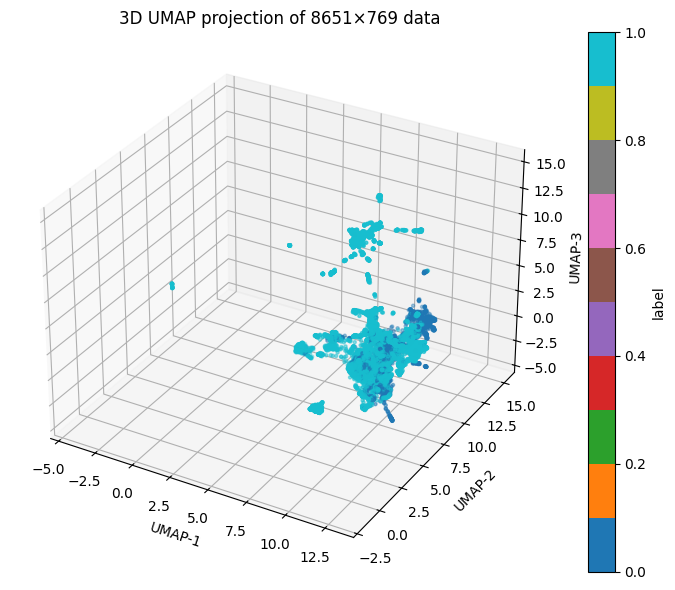

In [11]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

val = new_df_2.values

reducer = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric="euclidean",
    random_state=42
)

embedding = reducer.fit_transform(val)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

if "y" in globals():
    sc = ax.scatter(
        embedding[:, 0], embedding[:, 1], embedding[:, 2],
        c=y_2, s=5, cmap="tab10"
    )
    plt.colorbar(sc, ax=ax, label="label")
else:
    ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
               s=5, alpha=0.6)

ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
ax.set_title("3D UMAP projection of 8651×769 data")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


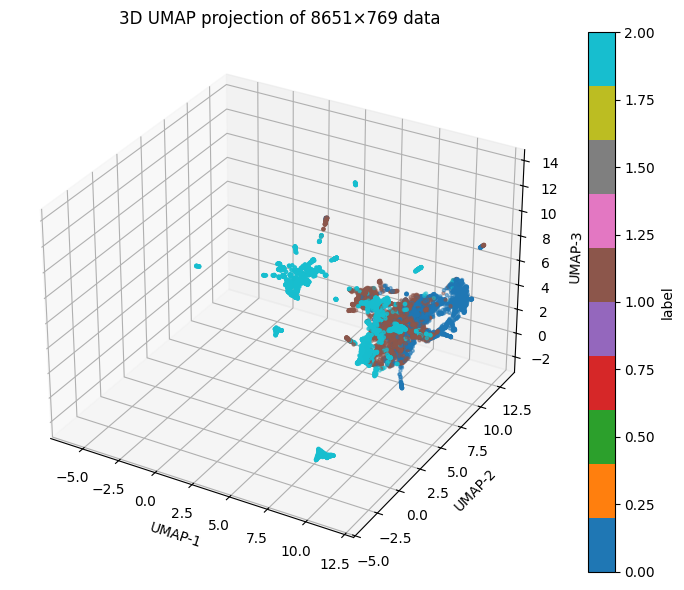

In [12]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

val = new_df_3.values

reducer = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric="euclidean",
    random_state=42
)

embedding = reducer.fit_transform(val)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

if "y" in globals():
    sc = ax.scatter(
        embedding[:, 0], embedding[:, 1], embedding[:, 2],
        c=y_3, s=5, cmap="tab10"
    )
    plt.colorbar(sc, ax=ax, label="label")
else:
    ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
               s=5, alpha=0.6)

ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
ax.set_title("3D UMAP projection of 8651×769 data")

plt.tight_layout()
plt.show()


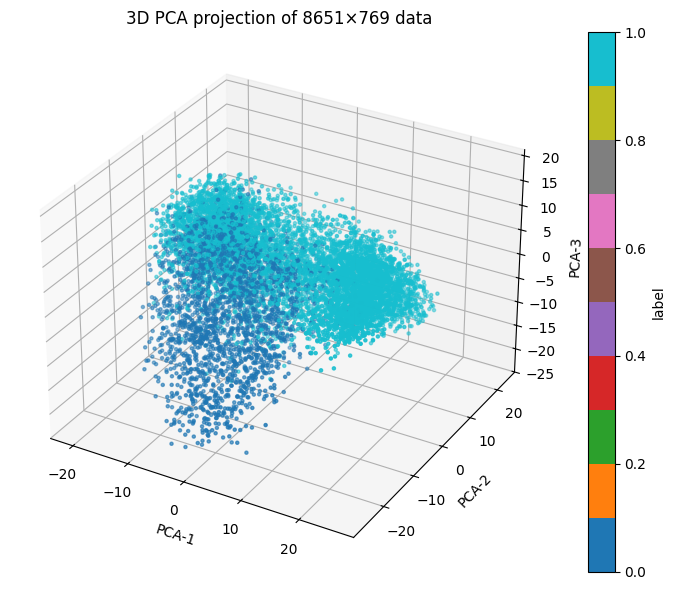

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df.values
x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=3, random_state=0)
x_pca = pca.fit_transform(x_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

if "y" in globals():
    sc = ax.scatter(
        x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
        c=y_2, s=5, cmap="tab10"
    )
    plt.colorbar(sc, ax=ax, label="label")
else:
    ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
               s=5, alpha=0.6)

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("PCA-3")
ax.set_title("3D PCA projection of 8651×769 data")

plt.tight_layout()
plt.show()


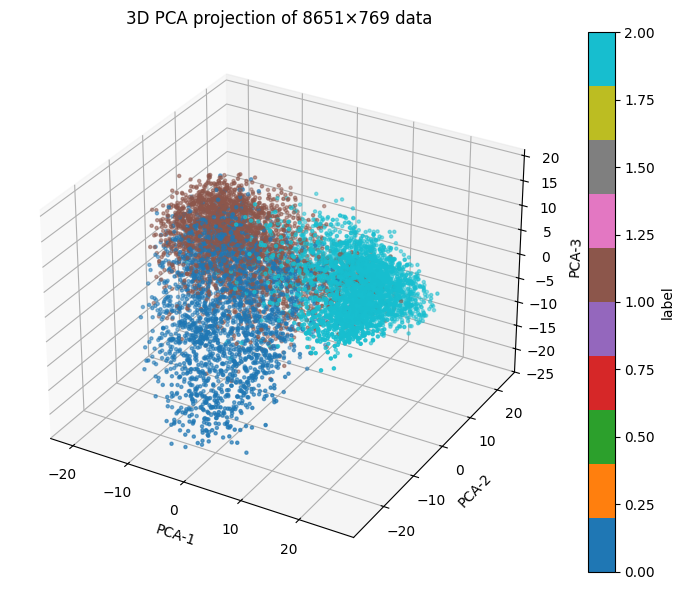

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df.values
x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=3, random_state=0)
x_pca = pca.fit_transform(x_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

if "y" in globals():
    sc = ax.scatter(
        x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
        c=y_3, s=5, cmap="tab10"
    )
    plt.colorbar(sc, ax=ax, label="label")
else:
    ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
               s=5, alpha=0.6)

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("PCA-3")
ax.set_title("3D PCA projection of 8651×769 data")

plt.tight_layout()
plt.show()


In [17]:
# from sklearn.manifold import TSNE

# pca50 = PCA(n_components=50, random_state=0).fit_transform(X_scaled)

# tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto',
#             init='pca', random_state=0)
# X_tsne = tsne.fit_transform(pca50)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.6,
#             c=y if 'y' in locals() else 'tab:blue')
# plt.title("t-SNE on PCA-reduced features")
# plt.tight_layout()
# plt.show()


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def make_ssl_split(X, y, test_size=0.2, labeled_fraction=0.1,
                   unlabeled_label=-1, random_state=42):

    # Force y to 1D (handles (n,1) arrays and single-column DataFrames)
    if isinstance(y, pd.DataFrame):
        y = y.iloc[:, 0]                       # Series (1D)
    y_np = np.asarray(y).ravel()               # (n,) [web:21]

    X_train, X_test, y_train_full, y_test = train_test_split(
        X, y_np,
        test_size=test_size,
        stratify=y_np,
        random_state=random_state,
    )

    rng = np.random.RandomState(random_state)
    y_train_ssl = np.full_like(y_train_full, fill_value=unlabeled_label)

    for c in np.unique(y_train_full):
        idx_c = np.where(y_train_full == c)[0]
        rng.shuffle(idx_c)
        n_labeled_c = max(1, int(len(idx_c) * labeled_fraction))
        labeled_idx_c = idx_c[:n_labeled_c]
        y_train_ssl[labeled_idx_c] = y_train_full[labeled_idx_c]

    return X_train, X_test, y_train_ssl, y_train_full, y_test


In [16]:
X_train_2, X_test_2, y_train_ssl_2, y_train_full_2, y_test_2 = make_ssl_split(
    X,
    y_2,
    test_size=0.1,
    labeled_fraction=0.2,
    unlabeled_label=-1,
    random_state=42,
)


In [17]:
X_train_3, X_test_3, y_train_ssl_3, y_train_full_3, y_test_3 = make_ssl_split(
    X,
    y_3,
    test_size=0.1,
    labeled_fraction=0.2,
    unlabeled_label=-1,
    random_state=42,
)


In [78]:
from sklearn.semi_supervised import LabelSpreading

ls_model_2 = LabelSpreading(kernel="rbf", alpha=0.17)
ls_model_2.fit(X_train_2, y_train_ssl_2)

y_train_pred_all = ls_model_2.transduction_

y_test_pred = ls_model_2.predict(X_test_2)
from sklearn.metrics import accuracy_score, classification_report

print("SSL accuracy:", accuracy_score(y_test_2, y_test_pred))
print(classification_report(y_test_2, y_test_pred))


SSL accuracy: 0.8579676674364896
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       246
           1       0.90      0.90      0.90       620

    accuracy                           0.86       866
   macro avg       0.83      0.83      0.83       866
weighted avg       0.86      0.86      0.86       866



In [84]:
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    top_k_accuracy_score,
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
    precision_recall_fscore_support,
    matthews_corrcoef,
    cohen_kappa_score,
    jaccard_score,
    roc_auc_score,
    average_precision_score,
    log_loss,
    brier_score_loss
)

# --- Required inputs (as in your code) ---
# y_test_2: true labels for test
# y_test_pred: predicted labels for test
# ls_model_2: fitted LabelSpreading model
# X_test_2: test features

y_true = y_test_2
y_pred = y_test_pred

# Try to get probabilities; LabelSpreading supports predict_proba in sklearn
y_proba = None
if hasattr(ls_model_2, "predict_proba"):
    try:
        y_proba = ls_model_2.predict_proba(X_test_2)
    except Exception:
        y_proba = None

labels = np.unique(np.concatenate([np.asarray(y_true), np.asarray(y_pred)]))

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_true, y_pred))
print("\nClassification report:\n", classification_report(y_true, y_pred, digits=4))

# Confusion matrices
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred, labels=labels))
print("\nMultilabel confusion matrix (one-vs-rest per class):\n",
      multilabel_confusion_matrix(y_true, y_pred, labels=labels))

# Aggregate P/R/F1 explicitly (useful if you want to log them)
for avg in ["micro", "macro", "weighted"]:
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=avg, zero_division=0)
    print(f"{avg.title()} Precision/Recall/F1: {p:.4f} / {r:.4f} / {f1:.4f}")

# Robust single-number agreement metrics
print("Matthews corrcoef (MCC):", matthews_corrcoef(y_true, y_pred))
print("Cohen's kappa:", cohen_kappa_score(y_true, y_pred))

# Jaccard (a.k.a IoU) generalized to multiclass; macro is common
print("Jaccard (macro):", jaccard_score(y_true, y_pred, average="macro"))

Accuracy: 0.8579676674364896
Balanced accuracy: 0.8260162601626017

Classification report:
               precision    recall  f1-score   support

           0     0.7490    0.7520    0.7505       246
           1     0.9015    0.9000    0.9007       620

    accuracy                         0.8580       866
   macro avg     0.8252    0.8260    0.8256       866
weighted avg     0.8581    0.8580    0.8581       866

Confusion matrix:
 [[185  61]
 [ 62 558]]

Multilabel confusion matrix (one-vs-rest per class):
 [[[558  62]
  [ 61 185]]

 [[185  61]
  [ 62 558]]]
Micro Precision/Recall/F1: 0.8580 / 0.8580 / 0.8580
Macro Precision/Recall/F1: 0.8252 / 0.8260 / 0.8256
Weighted Precision/Recall/F1: 0.8581 / 0.8580 / 0.8581
Matthews corrcoef (MCC): 0.6512366806045352
Cohen's kappa: 0.651234062616645
Jaccard (macro): 0.7100163052806225


In [86]:
from sklearn.semi_supervised import LabelSpreading

ls_model_3 = LabelSpreading(kernel="rbf", alpha=0.17)
ls_model_3.fit(X_train_3, y_train_ssl_3)

y_train_pred_all = ls_model_3.transduction_

y_test_pred = ls_model_3.predict(X_test_3)
from sklearn.metrics import accuracy_score, classification_report

print("SSL accuracy:", accuracy_score(y_test_3, y_test_pred))
print(classification_report(y_test_3, y_test_pred))


SSL accuracy: 0.815242494226328
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       246
           1       0.77      0.79      0.78       329
           2       0.92      0.89      0.90       291

    accuracy                           0.82       866
   macro avg       0.82      0.81      0.81       866
weighted avg       0.82      0.82      0.82       866



In [87]:
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,              # has zero_division [web:12]
    confusion_matrix,
    multilabel_confusion_matrix,
    precision_recall_fscore_support,
    matthews_corrcoef,
    cohen_kappa_score,
    jaccard_score,
    top_k_accuracy_score,               # k must be < n_classes to be meaningful [web:50]
    log_loss,
    roc_auc_score,                      # supports multiclass via OvR/OvO [web:16]
    average_precision_score,
    brier_score_loss
)

def evaluate_labelspreading(
    model,
    X_test,
    y_test,
    *,
    X_train=None,
    y_train=None,
    digits=4,
    zero_division=0,
    top_k=2,
    compute_auc=True,
):
    """
    Full evaluation for LabelSpreading/LabelPropagation-like models.
    Prints metrics + returns a dict (easy to log).
    """
    y_true = np.asarray(y_test)
    y_pred = np.asarray(model.predict(X_test))

    labels = np.unique(np.concatenate([y_true, y_pred]))
    n_classes = len(labels)

    # Try probabilities for probability-based metrics
    y_proba = None
    if hasattr(model, "predict_proba"):
        try:
            y_proba = model.predict_proba(X_test)
        except Exception:
            y_proba = None

    out = {}

    # --- Core metrics ---
    out["accuracy"] = accuracy_score(y_true, y_pred)
    out["balanced_accuracy"] = balanced_accuracy_score(y_true, y_pred)

    print(f"Accuracy: {out['accuracy']:.6f}")
    print(f"Balanced accuracy: {out['balanced_accuracy']:.6f}")

    # --- Report (handles undefined precision/recall via zero_division) ---
    print("\nClassification report:\n",
          classification_report(
              y_true, y_pred, labels=labels, digits=digits, zero_division=zero_division
          ))  # zero_division controls ill-defined metrics [web:12]

    # --- Confusion matrices ---
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    mcm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    print("Confusion matrix:\n", cm)
    print("\nMultilabel confusion matrix (OvR per class):\n", mcm)

    # --- P/R/F1 aggregates (explicit) ---
    for avg in ["micro", "macro", "weighted"]:
        p, r, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average=avg, labels=labels, zero_division=zero_division
        )
        out[f"precision_{avg}"] = float(p)
        out[f"recall_{avg}"] = float(r)
        out[f"f1_{avg}"] = float(f1)
        print(f"{avg.title()} Precision/Recall/F1: {p:.4f} / {r:.4f} / {f1:.4f}")

    # --- Agreement/robustness metrics ---
    out["mcc"] = float(matthews_corrcoef(y_true, y_pred))
    out["cohen_kappa"] = float(cohen_kappa_score(y_true, y_pred))
    out["jaccard_macro"] = float(jaccard_score(y_true, y_pred, average="macro", labels=labels, zero_division=zero_division))
    print("MCC:", out["mcc"])
    print("Cohen's kappa:", out["cohen_kappa"])
    print("Jaccard (macro):", out["jaccard_macro"])

    # --- Distribution sanity checks ---
    uniq_pred, cnt_pred = np.unique(y_pred, return_counts=True)
    out["pred_label_counts"] = dict(zip(uniq_pred.tolist(), cnt_pred.tolist()))
    print("\nPredicted label counts:", out["pred_label_counts"])

    # --- Probability-based metrics ---
    if y_proba is not None:
        # Top-k: only meaningful if k < n_classes [web:50]
        if top_k is not None and 1 <= top_k < y_proba.shape[1]:
            out[f"top_{top_k}_accuracy"] = float(top_k_accuracy_score(y_true, y_proba, k=top_k, labels=labels))
            print(f"Top-{top_k} accuracy:", out[f"top_{top_k}_accuracy"])
        else:
            print(f"Top-k skipped (k={top_k}) because it must be < n_classes={y_proba.shape[1]} to be meaningful. [web:50]")

        out["log_loss"] = float(log_loss(y_true, y_proba, labels=labels))
        print("Log loss:", out["log_loss"])

        # ROC-AUC: multiclass via one-vs-rest (ovr) is supported [web:16]
        if compute_auc:
            try:
                out["roc_auc_macro_ovr"] = float(
                    roc_auc_score(y_true, y_proba, multi_class="ovr", average="macro")
                )
                print("ROC-AUC (macro, ovr):", out["roc_auc_macro_ovr"])
            except Exception as e:
                print("ROC-AUC not computed:", repr(e))

            # Average precision: for multiclass you may need OvR binarization depending on sklearn version/setup
            try:
                out["avg_precision_macro"] = float(
                    average_precision_score(y_true, y_proba, average="macro")
                )
                print("Avg precision (macro):", out["avg_precision_macro"])
            except Exception as e:
                print("Avg precision not computed:", repr(e))

        # Brier: binary native; for multiclass compute OvR mean (custom but common)
        if y_proba.shape[1] == 2:
            out["brier"] = float(brier_score_loss(y_true, y_proba[:, 1]))
            print("Brier score loss:", out["brier"])
        else:
            y_true_ovr = (y_true[:, None] == labels[None, :]).astype(int)
            briers = [brier_score_loss(y_true_ovr[:, j], y_proba[:, j]) for j in range(n_classes)]
            out["brier_ovr_mean"] = float(np.mean(briers))
            print("Brier score loss (OVR mean):", out["brier_ovr_mean"])
    else:
        print("\nNote: predict_proba unavailable/failed, so top-k/logloss/AUC/PR-AUC/Brier are skipped.")

    # --- Optional: training transduction summary (SSL-specific) ---
    if X_train is not None and y_train is not None and hasattr(model, "transduction_"):
        y_train = np.asarray(y_train)
        labeled_mask = (y_train != -1)
        out["train_labeled_accuracy_on_transduction"] = float(
            accuracy_score(y_train[labeled_mask], model.transduction_[labeled_mask])
        )
        print("\nTrain labeled accuracy (transduction_ on labeled points):",
              out["train_labeled_accuracy_on_transduction"])

    return out


# ---- Example usage with your variables ----
# ls_model_3 = LabelSpreading(kernel="rbf", alpha=0.17).fit(X_train_3, y_train_ssl_3)

results = evaluate_labelspreading(
    model=ls_model_3,
    X_test=X_test_3,
    y_test=y_test_3,
    X_train=X_train_3,
    y_train=y_train_ssl_3,
    zero_division=0,
    top_k=2,          # for 3 classes, top_k=2 is meaningful; top_k=3 is not [web:50]
    compute_auc=True
)


Accuracy: 0.815242
Balanced accuracy: 0.813148

Classification report:
               precision    recall  f1-score   support

           0     0.7592    0.7561    0.7576       246
           1     0.7722    0.7933    0.7826       329
           2     0.9152    0.8900    0.9024       291

    accuracy                         0.8152       866
   macro avg     0.8155    0.8131    0.8142       866
weighted avg     0.8165    0.8152    0.8158       866

Confusion matrix:
 [[186  51   9]
 [ 53 261  15]
 [  6  26 259]]

Multilabel confusion matrix (OvR per class):
 [[[561  59]
  [ 60 186]]

 [[460  77]
  [ 68 261]]

 [[551  24]
  [ 32 259]]]
Micro Precision/Recall/F1: 0.8152 / 0.8152 / 0.8152
Macro Precision/Recall/F1: 0.8155 / 0.8131 / 0.8142
Weighted Precision/Recall/F1: 0.8165 / 0.8152 / 0.8158
MCC: 0.7208252940961365
Cohen's kappa: 0.7207189230263782
Jaccard (macro): 0.6916384768843784

Predicted label counts: {0: 245, 1: 338, 2: 283}
Top-2 accuracy: 0.9676674364896074
Log loss: 2.2228813

In [81]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_xgb = XGBClassifier(
    objective='binary:logistic',
    n_estimators=400,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
)
ssl_model_2 = SelfTrainingClassifier(
    clf_xgb,
    threshold=0.9,
    verbose=True
)

ssl_model_2.fit(X_train_2, y_train_ssl_2)

y_test_pred_2 = ssl_model_2.predict(X_test_2)
print("SSL accuracy:", accuracy_score(y_test_2, y_test_pred_2))
print(classification_report(y_test_2, y_test_pred_2))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:52:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 1, added 5264 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:53:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 2, added 442 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:53:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 3, added 118 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:54:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 4, added 63 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:55:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 5, added 34 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:56:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 6, added 20 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:57:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 7, added 19 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:58:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 8, added 11 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:59:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 9, added 7 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:00:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 10, added 9 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:01:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SSL accuracy: 0.8706697459584296
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       246
           1       0.88      0.95      0.91       620

    accuracy                           0.87       866
   macro avg       0.86      0.81      0.83       866
weighted avg       0.87      0.87      0.87       866



In [89]:
# Only evaluation metrics (no training code)

import numpy as np
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,              # supports zero_division [web:12]
    confusion_matrix,
    precision_recall_fscore_support,
    matthews_corrcoef,
    cohen_kappa_score,
    roc_auc_score,                      # supports binary + multiclass variants [web:16]
    average_precision_score,
    log_loss,
    brier_score_loss
)

y_true = y_test_2
y_pred = y_test_pred_2

labels = np.unique(np.concatenate([np.asarray(y_true), np.asarray(y_pred)]))
n_classes = len(labels)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_true, y_pred))

print("\nClassification report:\n",
      classification_report(y_true, y_pred, labels=labels, digits=4, zero_division=0))  # [web:12]

print("Confusion matrix:\n", confusion_matrix(y_true, y_pred, labels=labels))

for avg in ["micro", "macro", "weighted"]:
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=avg, labels=labels, zero_division=0)
    print(f"{avg.title()} Precision/Recall/F1: {p:.4f} / {r:.4f} / {f1:.4f}")

print("MCC:", matthews_corrcoef(y_true, y_pred))
print("Cohen's kappa:", cohen_kappa_score(y_true, y_pred))

# Probability-based metrics (only if available)
if hasattr(ssl_model_2, "predict_proba"):
    try:
        y_proba = ssl_model_2.predict_proba(X_test_2)

        print("Log loss:", log_loss(y_true, y_proba, labels=labels))

        if n_classes == 2:
            pos_proba = y_proba[:, 1]
            print("ROC-AUC:", roc_auc_score(y_true, pos_proba))
            print("PR-AUC (avg precision):", average_precision_score(y_true, pos_proba))
            print("Brier score loss:", brier_score_loss(y_true, pos_proba))
        else:
            print("ROC-AUC (macro, ovr):",
                  roc_auc_score(y_true, y_proba, multi_class="ovr", average="macro"))  # [web:16]
            # This may raise depending on label format/version; keep try/except if needed.
            print("Avg precision (macro):", average_precision_score(y_true, y_proba, average="macro"))

    except Exception as e:
        print("Probability-based metrics skipped (predict_proba failed):", repr(e))
else:
    print("Probability-based metrics skipped (predict_proba not available).")


Accuracy: 0.8706697459584296
Balanced accuracy: 0.8128179910831366

Classification report:
               precision    recall  f1-score   support

           0     0.8350    0.6789    0.7489       246
           1     0.8814    0.9468    0.9129       620

    accuracy                         0.8707       866
   macro avg     0.8582    0.8128    0.8309       866
weighted avg     0.8682    0.8707    0.8663       866

Confusion matrix:
 [[167  79]
 [ 33 587]]
Micro Precision/Recall/F1: 0.8707 / 0.8707 / 0.8707
Macro Precision/Recall/F1: 0.8582 / 0.8128 / 0.8309
Weighted Precision/Recall/F1: 0.8682 / 0.8707 / 0.8663
MCC: 0.6694729039671226
Cohen's kappa: 0.6630303367195208
Log loss: 0.4017929440854568
ROC-AUC: 0.9309008654602675
PR-AUC (avg precision): 0.9720168297118296
Brier score loss: 0.10595117578633668


In [92]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=400,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
)
ssl_model_3 = SelfTrainingClassifier(
    clf_xgb,
    threshold=0.9,
    verbose=True
)

ssl_model_3.fit(X_train_3, y_train_ssl_3)

y_test_pred = ssl_model_3.predict(X_test_3)
print("SSL accuracy:", accuracy_score(y_test_3, y_test_pred))
print(classification_report(y_test_3, y_test_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:05:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 1, added 4763 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:06:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 2, added 667 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 3, added 194 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:12:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 4, added 85 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:15:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 5, added 53 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:18:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 6, added 35 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:21:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 7, added 23 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:24:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 8, added 14 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:28:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 9, added 12 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:31:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 10, added 8 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:34:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SSL accuracy: 0.8060046189376443
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       246
           1       0.73      0.83      0.78       329
           2       0.88      0.89      0.88       291

    accuracy                           0.81       866
   macro avg       0.82      0.80      0.80       866
weighted avg       0.81      0.81      0.81       866



In [94]:

import numpy as np
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,              # zero_division available [web:12]
    confusion_matrix,
    precision_recall_fscore_support,
    matthews_corrcoef,
    cohen_kappa_score,
    jaccard_score,
    log_loss,
    roc_auc_score,                      # multiclass needs multi_class='ovr' or 'ovo' [web:16]
    average_precision_score,
    brier_score_loss
)

y_true = y_test_3
y_pred = y_test_pred  # output of ssl_model_3.predict(X_test_3)

labels = np.unique(np.concatenate([np.asarray(y_true), np.asarray(y_pred)]))
n_classes = len(labels)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_true, y_pred))

print("\nClassification report:\n",
      classification_report(y_true, y_pred, labels=labels, digits=4, zero_division=0))  # [web:12]

print("Confusion matrix:\n", confusion_matrix(y_true, y_pred, labels=labels))

for avg in ["micro", "macro", "weighted"]:
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=avg, labels=labels, zero_division=0)
    print(f"{avg.title()} Precision/Recall/F1: {p:.4f} / {r:.4f} / {f1:.4f}")

print("MCC:", matthews_corrcoef(y_true, y_pred))
print("Cohen's kappa:", cohen_kappa_score(y_true, y_pred))
print("Jaccard (macro):", jaccard_score(y_true, y_pred, average="macro", labels=labels, zero_division=0))

# Probability-based metrics (works if predict_proba exists; SelfTrainingClassifier typically exposes it) [web:31]
if hasattr(ssl_model_3, "predict_proba"):
    try:
        y_proba = ssl_model_3.predict_proba(X_test_3)

        print("Log loss:", log_loss(y_true, y_proba, labels=labels))

        # Multiclass ROC-AUC (OvR) [web:16]
        print("ROC-AUC (macro, ovr):",
              roc_auc_score(y_true, y_proba, multi_class="ovr", average="macro"))  # [web:16]

        # PR-AUC / average precision (may error depending on sklearn/version/format)
        try:
            print("Avg precision (macro):",
                  average_precision_score(y_true, y_proba, average="macro"))
        except Exception as e:
            print("Avg precision not computed:", repr(e))

        # Brier score: multiclass OvR mean (custom but useful)
        y_true_ovr = (np.asarray(y_true)[:, None] == labels[None, :]).astype(int)
        briers = [brier_score_loss(y_true_ovr[:, j], y_proba[:, j]) for j in range(n_classes)]
        print("Brier score loss (OVR mean):", float(np.mean(briers)))

    except Exception as e:
        print("Probability-based metrics skipped (predict_proba failed):", repr(e))
else:
    print("Probability-based metrics skipped (predict_proba not available).")


Accuracy: 0.8060046189376443
Balanced accuracy: 0.798757495925788

Classification report:
               precision    recall  f1-score   support

           0     0.8317    0.6829    0.7500       246
           1     0.7332    0.8267    0.7771       329
           2     0.8805    0.8866    0.8836       291

    accuracy                         0.8060       866
   macro avg     0.8151    0.7988    0.8036       866
weighted avg     0.8107    0.8060    0.8052       866

Confusion matrix:
 [[168  68  10]
 [ 32 272  25]
 [  2  31 258]]
Micro Precision/Recall/F1: 0.8060 / 0.8060 / 0.8060
Macro Precision/Recall/F1: 0.8151 / 0.7988 / 0.8036
Weighted Precision/Recall/F1: 0.8107 / 0.8060 / 0.8052
MCC: 0.7075591558096773
Cohen's kappa: 0.7048577723139842
Jaccard (macro): 0.6756416872121247
Log loss: 0.91184130083391
ROC-AUC (macro, ovr): 0.9389389356458032
Avg precision (macro): 0.8940731106168983
Brier score loss (OVR mean): 0.11536785157918915


In [24]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Base XGBoost model
xgb_base_3 = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_jobs=-1,
    tree_method="hist",
    random_state=42,
)

xgb_param_dist = {
    "n_estimators": randint(200, 600),
    "max_depth": randint(3, 12),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "min_child_weight": randint(1, 8),
    "gamma": uniform(0.0, 0.5),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_base_3,
    param_distributions=xgb_param_dist,
    n_iter=40,
    scoring="f1_macro",       # or "accuracy"
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

xgb_search.fit(X_train_supervised_3, y_train_supervised_3)
print("Best XGB params:", xgb_search.best_params_)
print("Best XGB CV score:", xgb_search.best_score_)
best_xgb = xgb_search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.semi_supervised import SelfTrainingClassifier

ssl_xgb = SelfTrainingClassifier(
    base_estimator=best_xgb,
    threshold=0.8,
    verbose=True,
)

ssl_xgb.fit(X_train_3, y_train_ssl_3)
y_test_pred = ssl_xgb.predict(X_test_3)


In [ ]:
from sklearn.svm import SVC

svm_base = SVC(
    kernel="rbf",
    probability=True,   # needed for SelfTrainingClassifier
    class_weight="balanced",  # useful if classes are imbalanced
    random_state=42,
)

from scipy.stats import loguniform

svm_param_dist = {
    "C": loguniform(1e-2, 1e3),      # 0.01–1000
    "gamma": loguniform(1e-4, 1e0),  # 1e-4–1
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_search = RandomizedSearchCV(
    estimator=svm_base,
    param_distributions=svm_param_dist,
    n_iter=40,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

svm_search.fit(X_train_supervised, y_train_supervised)

print("Best SVM params:", svm_search.best_params_)
print("Best SVM CV score:", svm_search.best_score_)
best_svm = svm_search.best_estimator_


In [ ]:
ssl_svm = SelfTrainingClassifier(
    base_estimator=best_svm,
    threshold=0.8,
    verbose=True,
)

ssl_svm.fit(X_train, y_train_ssl)
y_test_pred = ssl_svm.predict(X_test)


In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model_2 = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=400,
    learning_rate=0.1,
    max_depth=8,
    eval_metric='logloss',
)

print("Training Binary XGBoost...")
model_2.fit(X_train_supervised_2, y_train_supervised_2)

print("Predicting...")
preds = model_2.predict(X_test_supervised_2)

print(f"Accuracy: {accuracy_score(y_test_supervised_2, preds)}")
print("\nClassification Report:")
print(classification_report(y_test_supervised_2, preds))

Training Binary XGBoost...
Predicting...
Accuracy: 0.8827267475447718

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.78       491
           1       0.89      0.95      0.92      1240

    accuracy                           0.88      1731
   macro avg       0.87      0.83      0.85      1731
weighted avg       0.88      0.88      0.88      1731



In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model_3 = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=400,
    learning_rate=0.1,
    max_depth=8,
    eval_metric='logloss',
)

print("Training Binary XGBoost...")
model_3.fit(X_train_supervised_3, y_train_supervised_3)

print("Predicting...")
preds_3 = model_3.predict(X_test_supervised_3)

print(f"Accuracy: {accuracy_score(y_test_supervised_3, preds_3)}")
print("\nClassification Report:")
print(classification_report(y_test_supervised_3, preds_3))

Training Binary XGBoost...
Predicting...
Accuracy: 0.8399768919699596

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       491
           1       0.78      0.83      0.81       658
           2       0.92      0.92      0.92       582

    accuracy                           0.84      1731
   macro avg       0.84      0.84      0.84      1731
weighted avg       0.84      0.84      0.84      1731



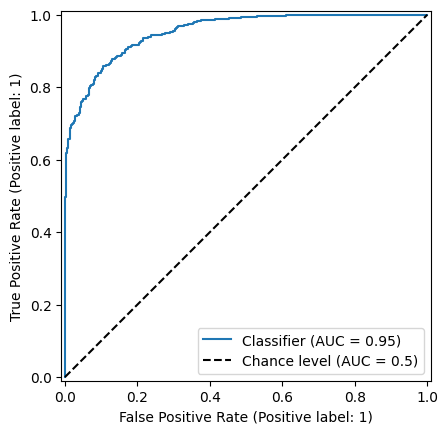

In [30]:
from sklearn.metrics import RocCurveDisplay

y_score = model_2.predict_proba(X_test_supervised_2)[:, 1]

RocCurveDisplay.from_predictions(y_test_supervised_2, y_score, plot_chance_level=True)


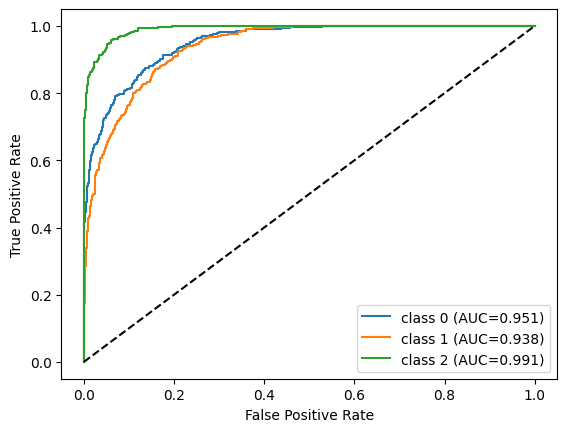

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = [0, 1, 2]
y_test_oh = label_binarize(y_test_supervised_3, classes=classes)
y_score = model_3.predict_proba(X_test_supervised_3)

fpr, tpr, roc_auc = {}, {}, {}
for i, c in enumerate(classes):
    fpr[c], tpr[c], _ = roc_curve(y_test_oh[:, i], y_score[:, i])
    roc_auc[c] = auc(fpr[c], tpr[c])

plt.figure()
for c in classes:
    plt.plot(fpr[c], tpr[c], label=f"class {c} (AUC={roc_auc[c]:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(); plt.show()


In [33]:
fpr_micro, tpr_micro, _ = roc_curve(y_test_oh.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

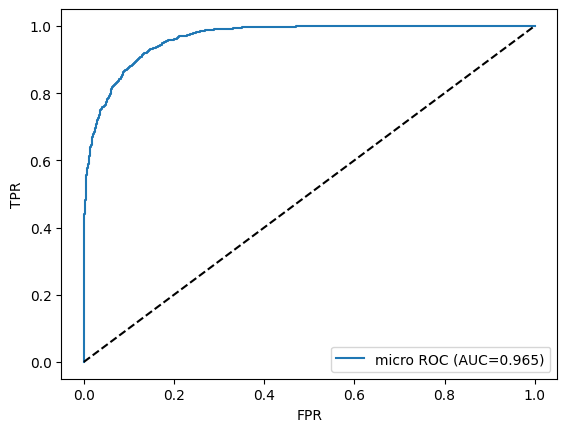

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = [0, 1, 2]

y_test = y_test_supervised_3              # true labels (n,)
y_score = model_3.predict_proba(X_test_supervised_3)   # probabilities (n,3)

y_test_oh = label_binarize(y_test, classes=classes)

fpr_micro, tpr_micro, _ = roc_curve(y_test_oh.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

plt.plot(fpr_micro, tpr_micro, label=f"micro ROC (AUC={auc_micro:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.show()



In [40]:
from sklearn.metrics import roc_auc_score
auc_micro = roc_auc_score(y_test_oh, y_score, average="micro", multi_class="ovr")
auc_macro = roc_auc_score(y_test_oh, y_score, average="macro", multi_class="ovr")
print("AUC micro:", auc_micro, "AUC macro:", auc_macro)


AUC micro: 0.9646701448857464 AUC macro: 0.9600476133829862


In [42]:
import numpy as np
from sklearn.metrics import cohen_kappa_score, mean_absolute_error, classification_report

def eval_ordinal_3class(y_true, y_pred, name="model"):
    qwk = cohen_kappa_score(y_true, y_pred, weights="quadratic")
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n[{name}] QWK={qwk:.4f} | MAE={mae:.4f}")
    print(classification_report(y_true, y_pred, digits=4))


y_pred3 = model_3.predict(X_test_supervised_3)
eval_ordinal_3class(y_test_supervised_3, y_pred3, "XGB-3class")





[XGB-3class] QWK=0.8474 | MAE=0.1681
              precision    recall  f1-score   support

           0     0.8307    0.7597    0.7936       491
           1     0.7825    0.8313    0.8062       658
           2     0.9160    0.9175    0.9167       582

    accuracy                         0.8400      1731
   macro avg     0.8431    0.8362    0.8388      1731
weighted avg     0.8411    0.8400    0.8398      1731



AP micro: 0.9362893317114256
AP macro: 0.9276817072349384


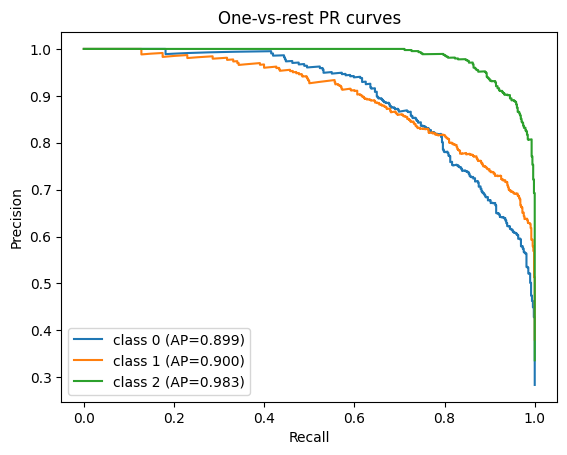

In [44]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

classes = [0, 1, 2]

y_true = y_test_supervised_3
y_score = model_3.predict_proba(X_test_supervised_3)
y_true_oh = label_binarize(y_true, classes=classes)

# AP numbers
ap_micro = average_precision_score(y_true_oh, y_score, average="micro")
ap_macro = average_precision_score(y_true_oh, y_score, average="macro")
print("AP micro:", ap_micro)
print("AP macro:", ap_macro)

# PR curves per class
plt.figure()
for i, c in enumerate(classes):
    prec, rec, _ = precision_recall_curve(y_true_oh[:, i], y_score[:, i])
    ap = average_precision_score(y_true_oh[:, i], y_score[:, i])
    plt.plot(rec, prec, label=f"class {c} (AP={ap:.3f})")

plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend(); plt.title("One-vs-rest PR curves"); plt.show()


Multiclass Brier: 0.24436433531513702


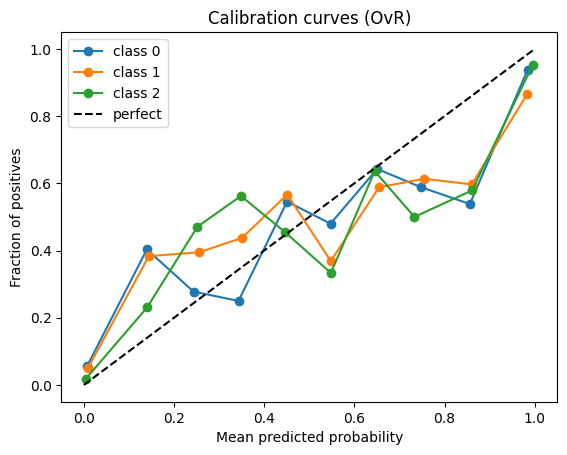

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.calibration import calibration_curve

classes = [0, 1, 2]
y_true = y_test_supervised_3
y_prob = model_3.predict_proba(X_test_supervised_3)
y_true_oh = label_binarize(y_true, classes=classes)

brier_multi = np.mean(np.sum((y_prob - y_true_oh) ** 2, axis=1))
print("Multiclass Brier:", brier_multi)

# Calibration plots per class (OvR)
plt.figure()
for i, c in enumerate(classes):
    frac_pos, mean_pred = calibration_curve(y_true_oh[:, i], y_prob[:, i], n_bins=10, strategy="uniform")
    plt.plot(mean_pred, frac_pos, marker="o", label=f"class {c}")

plt.plot([0,1],[0,1],"k--", label="perfect")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration curves (OvR)")
plt.legend()
plt.show()


In [48]:
import numpy as np
from sklearn.preprocessing import label_binarize

classes = [0,1,2]
y_true = y_test_supervised_3
y_true_oh = label_binarize(y_true, classes=classes)

# Prior probs from test (or better: from train)
p = y_true_oh.mean(axis=0)                 # shape (3,)
p_prior = np.tile(p, (len(y_true), 1))     # shape (n,3)

brier_prior = np.mean(np.sum((p_prior - y_true_oh)**2, axis=1))
print("Prior baseline Brier:", brier_prior)

print("Model Brier:", 0.24436433531513702)
print("Brier improvement (baseline - model):", brier_prior - 0.24436433531513702)


Prior baseline Brier: 0.6620003397454447
Model Brier: 0.24436433531513702
Brier improvement (baseline - model): 0.4176360044303077


Average precision (AP): 0.9812526665997029


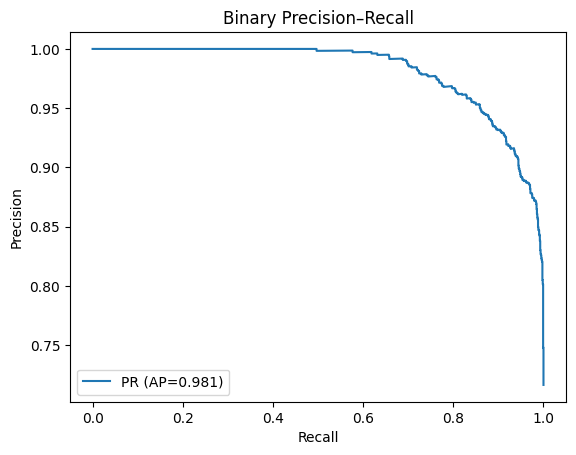

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true = y_test_supervised_2
y_score = model_2.predict_proba(X_test_supervised_2)[:, 1]

ap = average_precision_score(y_true, y_score)
print("Average precision (AP):", ap)

prec, rec, _ = precision_recall_curve(y_true, y_score)
plt.plot(rec, prec, label=f"PR (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Binary Precision–Recall")
plt.legend()
plt.show()


Brier (binary): 0.08692621655649309


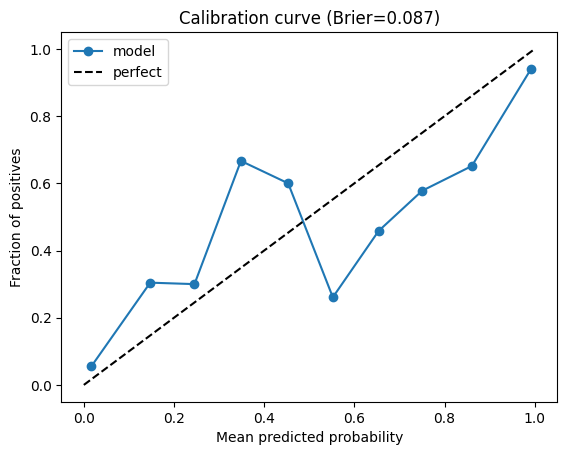

Prior baseline Brier: 0.20319313994542046 | improvement: 0.11626692338892737


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

y_true = y_test_supervised_2
y_prob = model_2.predict_proba(X_test_supervised_2)[:, 1]

brier = brier_score_loss(y_true, y_prob)
print("Brier (binary):", brier)

frac_pos, mean_pred = calibration_curve(y_true, y_prob, n_bins=10, strategy="uniform")

plt.plot(mean_pred, frac_pos, marker="o", label="model")
plt.plot([0,1],[0,1],"k--", label="perfect")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title(f"Calibration curve (Brier={brier:.3f})")
plt.legend()
plt.show()

# Optional: naive prior baseline Brier (always predict prevalence)
p = np.mean(y_true)
brier_prior = brier_score_loss(y_true, np.full_like(y_prob, fill_value=p, dtype=float))
print("Prior baseline Brier:", brier_prior, "| improvement:", brier_prior - brier)


In [52]:
print(f"Original Labels (train): {np.unique(y)}")

y2 = np.copy(y)

benign_mask   = (y == 0) | (y == 1) | (y == 2)|(y == 3) | (y == 4)
carc_mask     = (y == 5) | (y == 6)

y2[benign_mask]  = 0
y2[carc_mask]   = 1

print("3-class Labels Created (train). Counts:")
unique, counts = np.unique(y2, return_counts=True)
print(dict(zip(["Benign (0)", "Carcinoma (1)"], counts)))

Original Labels (train): [0 1 2 3 4 5 6]
3-class Labels Created (train). Counts:
{'Benign (0)': np.int64(5742), 'Carcinoma (1)': np.int64(2909)}


In [53]:
y2=pd.DataFrame(y2)
new_df2=pd.concat([X,y2],axis=1)
# new_df2.to_csv("breast_cancer_data_3.csv",index=False)

In [57]:
X_train_supervised2,X_test_supervised2,y_train_supervised2,y_test_supervised2=train_test_split(X,y2,test_size=0.2,random_state=42,stratify=y2)

In [58]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model2 = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=400,
    learning_rate=0.1,
    max_depth=8,
    eval_metric='logloss',
)

print("Training Binary XGBoost...")
model2.fit(X_train_supervised2, y_train_supervised2)

print("Predicting...")
preds = model2.predict(X_test_supervised2)

print(f"Accuracy: {accuracy_score(y_test_supervised2, preds)}")
print("\nClassification Report:")
print(classification_report(y_test_supervised2, preds))

Training Binary XGBoost...
Predicting...
Accuracy: 0.9485846331600231

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1149
           1       0.94      0.91      0.92       582

    accuracy                           0.95      1731
   macro avg       0.95      0.94      0.94      1731
weighted avg       0.95      0.95      0.95      1731



In [96]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


print("Initializing Ensemble Models...")

clf_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

clf_xgb = XGBClassifier(
   objective='binary:logistic',
    n_estimators=400,
    learning_rate=0.1,
    max_depth=8,
    eval_metric='logloss',
)

clf_svm = SVC(
    kernel='rbf',
    C=1.0,
    probability=True,
    random_state=42
)

voting_clf2 = VotingClassifier(
    estimators=[
        ('rf', clf_rf),
        ('xgb', clf_xgb),
        ('svm', clf_svm)
    ],
    voting='soft',
    n_jobs=-1
)

print("Training Ensemble (this may take a few minutes)...")
voting_clf2.fit(X_train_supervised2, y_train_supervised2)

print("Evaluating Ensemble...")
y_pred = voting_clf2.predict(X_test_supervised2)
print(f"Accuracy: {accuracy_score(y_test_supervised2, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test_supervised2, y_pred, target_names=["Safe", "Unsafe"]))


Initializing Ensemble Models...
Training Ensemble (this may take a few minutes)...


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Evaluating Ensemble...
Accuracy: 0.9491623339110341

Classification Report:
              precision    recall  f1-score   support

        Safe       0.95      0.97      0.96      1149
      Unsafe       0.94      0.90      0.92       582

    accuracy                           0.95      1731
   macro avg       0.95      0.94      0.94      1731
weighted avg       0.95      0.95      0.95      1731



In [62]:
X_train2, X_test2, y_train_ssl2, y_train_full2, y_test2 = make_ssl_split(
    X,
    y2,
    test_size=0.1,
    labeled_fraction=0.2,
    unlabeled_label=-1,
    random_state=42,
)

In [107]:
from sklearn.semi_supervised import LabelSpreading

ls_model2 = LabelSpreading(kernel="rbf", alpha=0.17)
ls_model2.fit(X_train2, y_train_ssl2)

y_train_pred_all = ls_model2.transduction_

y_test_pred = ls_model2.predict(X_test2)
from sklearn.metrics import accuracy_score, classification_report

print("SSL accuracy:", accuracy_score(y_test2, y_test_pred))
print(classification_report(y_test2, y_test_pred))

SSL accuracy: 0.9422632794457275
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       575
           1       0.93      0.90      0.91       291

    accuracy                           0.94       866
   macro avg       0.94      0.93      0.93       866
weighted avg       0.94      0.94      0.94       866



Accuracy: 0.9422632794457275
Balanced accuracy: 0.9310623038995967
MCC: 0.8697999237760095

Confusion matrix:
 [[555  20]
 [ 30 261]]

Classification report:
               precision    recall  f1-score   support

           0     0.9487    0.9652    0.9569       575
           1     0.9288    0.8969    0.9126       291

    accuracy                         0.9423       866
   macro avg     0.9388    0.9311    0.9347       866
weighted avg     0.9420    0.9423    0.9420       866


ROC-AUC: 0.9796473927984461
Average Precision (AP): 0.9550054506406591
Brier: 0.054323492841235166


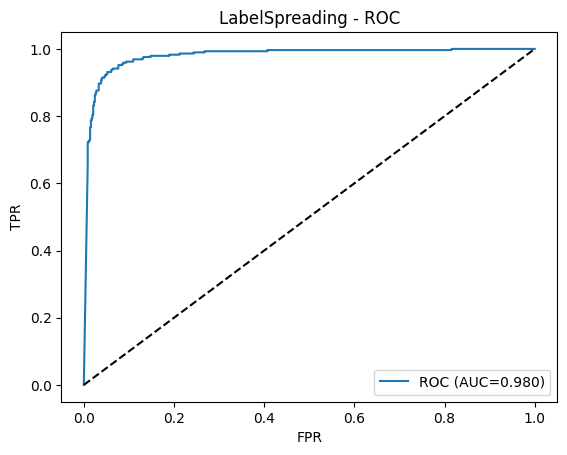

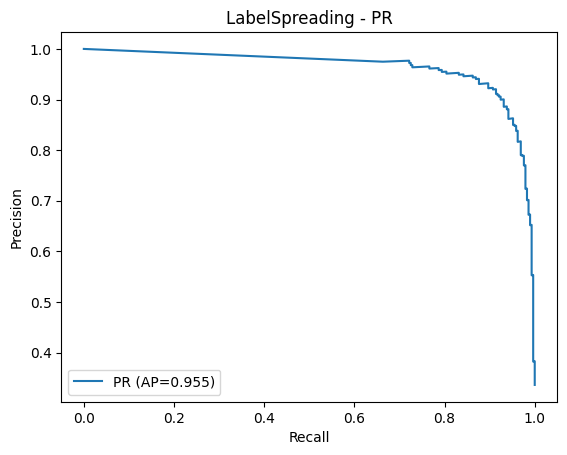

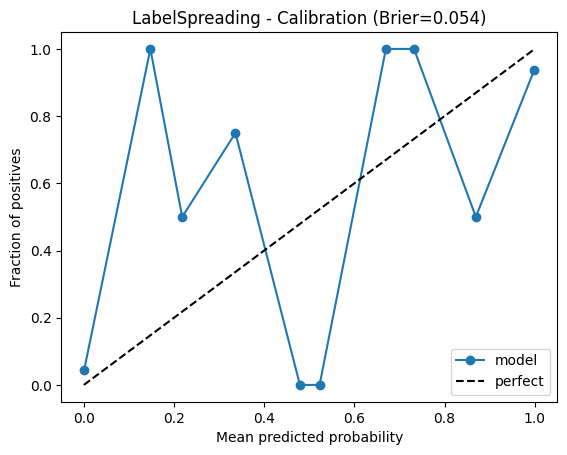

Prior baseline Brier: 0.22311308930123902 | improvement: 0.16878959646000385


In [73]:
# Metrics for your fitted LabelSpreading (binary classes 0/1)
# Uses hard-label metrics + probability metrics (ROC-AUC, PR-AUC, Brier, calibration).
# LabelSpreading supports predict_proba(). [web:202][web:39][web:44][web:175][web:161]

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix,
    matthews_corrcoef,
    roc_auc_score, roc_curve,
    average_precision_score, precision_recall_curve,
    brier_score_loss,
)
from sklearn.calibration import calibration_curve

# ---- true/pred ----
y_true = np.asarray(y_test2)
y_pred = ssl_model2.predict(X_test2)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_true, y_pred))  # good for imbalance [web:274]
print("MCC:", matthews_corrcoef(y_true, y_pred))                      # strong single-number summary [web:270]
print("\nConfusion matrix:\n", confusion_matrix(y_true, y_pred))       # [web:144]
print("\nClassification report:\n", classification_report(y_true, y_pred, digits=4))  # [web:171]

# ---- probability-based metrics (positive class = 1) ----
y_score = ssl_model2.predict_proba(X_test2)[:, 1]  # [web:202]

roc_auc = roc_auc_score(y_true, y_score)          # [web:39]
ap = average_precision_score(y_true, y_score)     # [web:44]
brier = brier_score_loss(y_true, y_score)         # [web:175]

print("\nROC-AUC:", roc_auc)
print("Average Precision (AP):", ap)
print("Brier:", brier)

# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_score)          # [web:46]
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("LabelSpreading - ROC")
plt.legend(); plt.show()

# Precision-Recall curve
prec, rec, _ = precision_recall_curve(y_true, y_score)
plt.figure()
plt.plot(rec, prec, label=f"PR (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("LabelSpreading - PR")
plt.legend(); plt.show()

# Calibration curve
frac_pos, mean_pred = calibration_curve(y_true, y_score, n_bins=10, strategy="uniform")  # [web:161]
plt.figure()
plt.plot(mean_pred, frac_pos, marker="o", label="model")
plt.plot([0,1],[0,1],"k--", label="perfect")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title(f"LabelSpreading - Calibration (Brier={brier:.3f})")
plt.legend(); plt.show()

# Optional: prior baseline Brier (always predict prevalence)
p = y_true.mean()
brier_prior = brier_score_loss(y_true, np.full_like(y_score, p, dtype=float))
print("Prior baseline Brier:", brier_prior, "| improvement:", brier_prior - brier)



In [65]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

clf_xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1,
)
ssl_model2 = SelfTrainingClassifier(
    clf_xgb,
    threshold=0.9,
    verbose=True
)

ssl_model2.fit(X_train2, y_train_ssl2)

y_test_pred2 = ssl_model2.predict(X_test2)
print("SSL accuracy:", accuracy_score(y_test2, y_test_pred2))
print(classification_report(y_test2, y_test_pred2))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:12:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 1, added 5714 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:12:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 2, added 250 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:13:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 3, added 70 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:14:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 4, added 36 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:14:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 5, added 11 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:15:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 6, added 10 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:16:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 7, added 7 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:17:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 8, added 4 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:17:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 9, added 3 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:18:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


End of iteration 10, added 4 new labels.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:19:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SSL accuracy: 0.918013856812933
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       575
           1       0.89      0.86      0.88       291

    accuracy                           0.92       866
   macro avg       0.91      0.90      0.91       866
weighted avg       0.92      0.92      0.92       866



Accuracy: 0.918013856812933
Balanced accuracy: 0.9034663080830718
MCC: 0.814872878048496

Confusion matrix:
 [[545  30]
 [ 41 250]]

Classification report:
               precision    recall  f1-score   support

           0     0.9300    0.9478    0.9388       575
           1     0.8929    0.8591    0.8757       291

    accuracy                         0.9180       866
   macro avg     0.9114    0.9035    0.9073       866
weighted avg     0.9175    0.9180    0.9176       866


ROC-AUC: 0.9790766472433886
Average Precision (AP): 0.9637855276872087
Brier: 0.07085254076766989


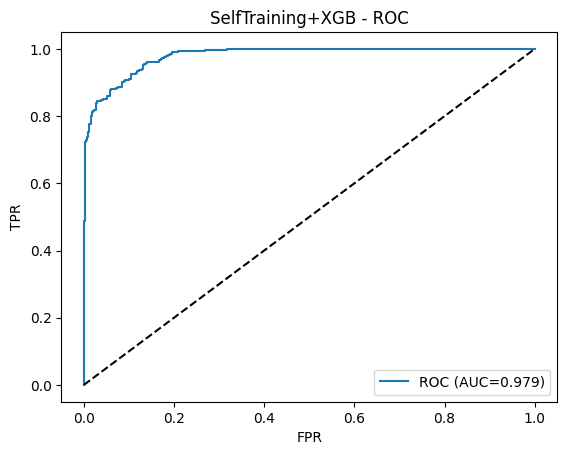

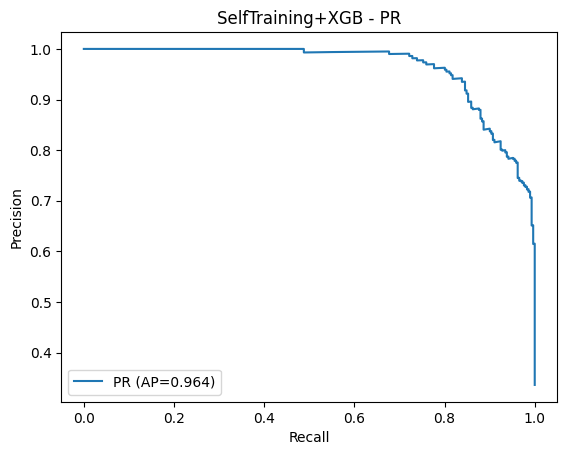

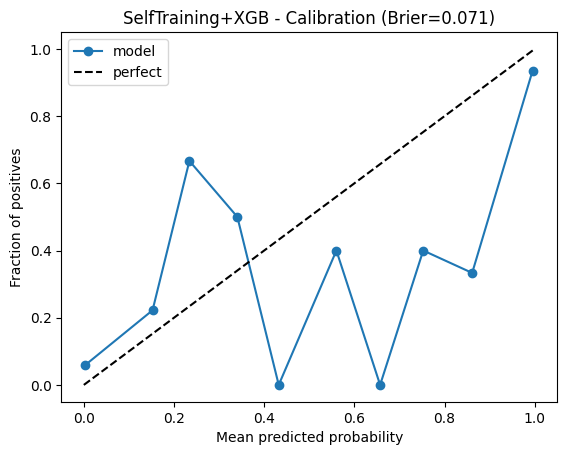

Prior baseline Brier: 0.22311308930123902 | improvement: 0.15226054853356913


In [74]:
# Metrics for your fitted SelfTrainingClassifier(+XGB) on binary classes {0,1}
# Includes hard-label metrics + probability metrics (ROC-AUC, PR-AUC, Brier, calibration). [web:222][web:39][web:44][web:175][web:161]

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix,
    matthews_corrcoef,
    roc_auc_score, roc_curve,
    average_precision_score, precision_recall_curve,
    brier_score_loss,
)
from sklearn.calibration import calibration_curve

y_true = np.asarray(y_test2)
y_pred = ssl_model2.predict(X_test2)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_true, y_pred))  # [web:274]
print("MCC:", matthews_corrcoef(y_true, y_pred))                      # [web:270]
print("\nConfusion matrix:\n", confusion_matrix(y_true, y_pred))       # [web:144]
print("\nClassification report:\n", classification_report(y_true, y_pred, digits=4))  # [web:171]

# Probability metrics (works if underlying estimator supports predict_proba, which XGBClassifier does)
if hasattr(ssl_model2, "predict_proba"):
    y_score = ssl_model2.predict_proba(X_test2)[:, 1]                # [web:222]

    roc_auc = roc_auc_score(y_true, y_score)                         # [web:39]
    ap = average_precision_score(y_true, y_score)                    # [web:44]
    brier = brier_score_loss(y_true, y_score)                        # [web:175]

    print("\nROC-AUC:", roc_auc)
    print("Average Precision (AP):", ap)
    print("Brier:", brier)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_score)                         # [web:46]
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("SelfTraining+XGB - ROC")
    plt.legend(); plt.show()

    # PR curve
    prec, rec, _ = precision_recall_curve(y_true, y_score)
    plt.figure()
    plt.plot(rec, prec, label=f"PR (AP={ap:.3f})")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("SelfTraining+XGB - PR")
    plt.legend(); plt.show()

    # Calibration curve
    frac_pos, mean_pred = calibration_curve(y_true, y_score, n_bins=10, strategy="uniform")  # [web:161]
    plt.figure()
    plt.plot(mean_pred, frac_pos, marker="o", label="model")
    plt.plot([0,1],[0,1],"k--", label="perfect")
    plt.xlabel("Mean predicted probability")
    plt.ylabel("Fraction of positives")
    plt.title(f"SelfTraining+XGB - Calibration (Brier={brier:.3f})")
    plt.legend(); plt.show()

    # Prior baseline Brier
    p = y_true.mean()
    brier_prior = brier_score_loss(y_true, np.full_like(y_score, p, dtype=float))
    print("Prior baseline Brier:", brier_prior, "| improvement:", brier_prior - brier)

else:
    print("\nNo predict_proba() available -> skip ROC/PR/Brier/Calibration.")


In [72]:
import numpy as np
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import StratifiedKFold, ParameterSampler
from sklearn.metrics import f1_score, accuracy_score, classification_report
from scipy.stats import uniform, loguniform

# ----- your data -----
X_all = X_train2
y_all = np.asarray(y_train_ssl2)
X_test = X_test2
y_test = np.asarray(y_test2)

def row_select(X, idx):
    return X.iloc[idx] if hasattr(X, "iloc") else X[idx]

lab_idx = np.where(y_all != -1)[0]
unlab_idx = np.where(y_all == -1)[0]

X_lab = row_select(X_all, lab_idx)
y_lab = y_all[lab_idx]

print("Labeled:", len(lab_idx), "Unlabeled:", len(unlab_idx))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_dist = {
    "alpha": uniform(0.01, 0.98),
    "gamma": loguniform(1e-4, 1e2),
    "max_iter": [30, 50, 100, 200],
    "tol": [1e-2, 1e-3, 1e-4],
}

def build_model(params):
    m = LabelSpreading(kernel="rbf")
    m.set_params(**params)
    return m

def cv_score(params):
    scores = []
    for tr, va in cv.split(X_lab, y_lab):
        tr_lab_idx = lab_idx[tr]
        va_lab_idx = lab_idx[va]

        fit_idx = np.concatenate([tr_lab_idx, unlab_idx])     # labeled-train + all unlabeled
        X_fit = row_select(X_all, fit_idx)
        y_fit = y_all[fit_idx]

        model = build_model(params)
        model.fit(X_fit, y_fit)

        X_val = row_select(X_all, va_lab_idx)
        y_val = y_all[va_lab_idx]
        y_val_pred = model.predict(X_val)

        scores.append(f1_score(y_val, y_val_pred, average="macro"))
    return float(np.mean(scores))

# random search manually
n_iter = 40
sampler = ParameterSampler(param_dist, n_iter=n_iter, random_state=42)

best_params, best_score = None, -np.inf
for i, params in enumerate(sampler, 1):
    s = cv_score(params)
    if s > best_score:
        best_score, best_params = s, params
    print(f"{i:02d}/{n_iter} f1_macro={s:.4f} best={best_score:.4f}")

print("\nBEST CV f1_macro:", best_score)
print("BEST PARAMS:", best_params)

# fit best on full SSL train, evaluate on test
best_ssl = build_model(best_params)
best_ssl.fit(X_all, y_all)

y_pred = best_ssl.predict(X_test)
print("\nTEST accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


Labeled: 1556 Unlabeled: 6229


/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


01/40 f1_macro=0.9390 best=0.9390
02/40 f1_macro=0.3990 best=0.9390
03/40 f1_macro=0.3990 best=0.9390


/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


04/40 f1_macro=0.9298 best=0.9390
05/40 f1_macro=0.3990 best=0.9390
06/40 f1_macro=0.8206 best=0.9390
07/40 f1_macro=0.9408 best=0.9408
08/40 f1_macro=0.9376 best=0.9408
09/40 f1_macro=0.3990 best=0.9408
10/40 f1_macro=0.3990 best=0.9408


/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=30 was reached without convergence.
  warnings.warn(


11/40 f1_macro=0.9434 best=0.9434
12/40 f1_macro=0.9454 best=0.9454
13/40 f1_macro=0.9383 best=0.9454
14/40 f1_macro=0.3990 best=0.9454
15/40 f1_macro=0.3990 best=0.9454
16/40 f1_macro=0.9340 best=0.9454
17/40 f1_macro=0.9383 best=0.9454
18/40 f1_macro=0.3990 best=0.9454
19/40 f1_macro=0.3990 best=0.9454
20/40 f1_macro=0.3990 best=0.9454
21/40 f1_macro=0.9340 best=0.9454


/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=200 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=200 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=200 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=200 was reached without convergence.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:324: ConvergenceWarning: max_iter=200 was reached without convergence.
  warnings.warn(


22/40 f1_macro=0.9414 best=0.9454
23/40 f1_macro=0.9470 best=0.9470
24/40 f1_macro=0.3990 best=0.9470
25/40 f1_macro=0.9324 best=0.9470
26/40 f1_macro=0.3990 best=0.9470
27/40 f1_macro=0.9490 best=0.9490
28/40 f1_macro=0.3990 best=0.9490
29/40 f1_macro=0.8692 best=0.9490
30/40 f1_macro=0.7922 best=0.9490
31/40 f1_macro=0.3990 best=0.9490
32/40 f1_macro=0.8857 best=0.9490
33/40 f1_macro=0.9355 best=0.9490


/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


34/40 f1_macro=0.9383 best=0.9490
35/40 f1_macro=0.9383 best=0.9490
36/40 f1_macro=0.3990 best=0.9490
37/40 f1_macro=0.3990 best=0.9490
38/40 f1_macro=0.3990 best=0.9490
39/40 f1_macro=0.9368 best=0.9490
40/40 f1_macro=0.7934 best=0.9490

BEST CV f1_macro: 0.9489895862936203
BEST PARAMS: {'alpha': np.float64(0.7250140547713028), 'gamma': np.float64(0.6688747907702062), 'max_iter': 100, 'tol': 0.0001}

TEST accuracy: 0.9376443418013857
              precision    recall  f1-score   support

           0     0.9408    0.9670    0.9537       575
           1     0.9309    0.8797    0.9046       291

    accuracy                         0.9376       866
   macro avg     0.9358    0.9233    0.9291       866
weighted avg     0.9375    0.9376    0.9372       866




Extra metrics:
Balanced accuracy: 0.9034663080830718
MCC: 0.814872878048496
Confusion matrix:
 [[545  30]
 [ 41 250]]
ROC-AUC: 0.9876766771253548
AP (PR-AUC): 0.9780703431414138
Brier: 0.04358736658635095


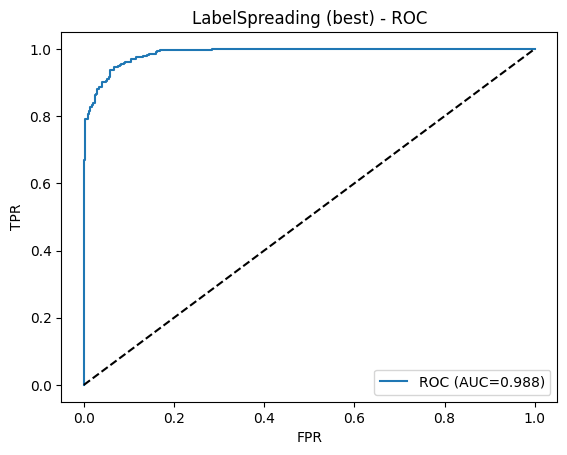

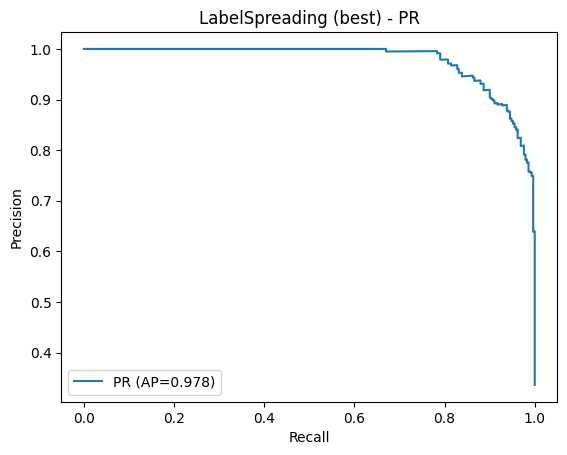

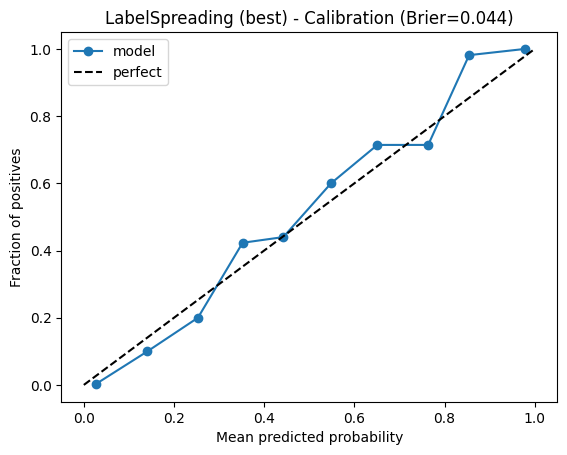

Prior baseline Brier: 0.22311308930123902 | improvement: 0.17952572271488806


In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix, balanced_accuracy_score, matthews_corrcoef,
    roc_auc_score, roc_curve,
    average_precision_score, precision_recall_curve,
    brier_score_loss
)
from sklearn.calibration import calibration_curve

# y_test and y_pred already exist
print("\nExtra metrics:")
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))   # [web:274]
print("MCC:", matthews_corrcoef(y_test, y_pred))                       # [web:270]
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))         # [web:144]

# Probability-based metrics/plots (LabelSpreading supports predict_proba) [web:202]
y_score = best_ssl.predict_proba(X_test)[:, 1]   # positive class = 1 [web:202]

roc_auc = roc_auc_score(y_test, y_score)         # [web:39]
ap = average_precision_score(y_test, y_score)    # [web:44]
brier = brier_score_loss(y_test, y_score)        # [web:175]

print("ROC-AUC:", roc_auc)
print("AP (PR-AUC):", ap)
print("Brier:", brier)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)         # [web:46]
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("LabelSpreading (best) - ROC")
plt.legend(); plt.show()

# PR curve
prec, rec, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(rec, prec, label=f"PR (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("LabelSpreading (best) - PR")
plt.legend(); plt.show()

# Calibration curve
frac_pos, mean_pred = calibration_curve(y_test, y_score, n_bins=10, strategy="uniform")  # [web:161]
plt.figure()
plt.plot(mean_pred, frac_pos, marker="o", label="model")
plt.plot([0,1],[0,1],"k--", label="perfect")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title(f"LabelSpreading (best) - Calibration (Brier={brier:.3f})")
plt.legend(); plt.show()

# Prior baseline Brier (always predict prevalence)
p = float(np.mean(y_test))
brier_prior = brier_score_loss(y_test, np.full_like(y_score, p, dtype=float))
print("Prior baseline Brier:", brier_prior, "| improvement:", brier_prior - brier)


In [98]:
# Save only the models that had an accuracy printed in the notebook outputs.
# Run this AFTER you have run the training cells (so the model variables exist in memory).

import os, shutil

OUT_DIR = "models_with_acc"
os.makedirs(OUT_DIR, exist_ok=True)

# Names + accuracies extracted from the notebook outputs
MODELS_WITH_ACC = {
    "clf_svm": 0.949162,
    "voting_clf2": 0.949162,
    "model2": 0.948585,
    "ssl_model2": 0.942263,
    "model_2": 0.882727,
    "ssl_model_2": 0.870670,
    "ls_model_2": 0.857968,
    "model_3": 0.839977,
    "ls_model_3": 0.815242,
    "model": 0.815242,
    "ssl_model_3": 0.806005,
}

# Optional deps
try:
    import joblib
except Exception:
    joblib = None

def save_one(name, obj, acc):
    saved_paths = []

    # Prefer XGBoost native save_model when available
    if hasattr(obj, "save_model") and callable(getattr(obj, "save_model")):
        path = os.path.join(OUT_DIR, f"{name}__acc_{acc:.6f}.json")
        obj.save_model(path)
        saved_paths.append(path)
        return saved_paths

    # Otherwise use joblib for sklearn-style objects (VotingClassifier, SVC, LabelSpreading, SelfTrainingClassifier, etc.)
    if joblib is not None:
        path = os.path.join(OUT_DIR, f"{name}__acc_{acc:.6f}.joblib")
        joblib.dump(obj, path)
        saved_paths.append(path)
        return saved_paths

    raise RuntimeError(
        "joblib is not available. Install it (pip install joblib) or run in an environment that has it."
    )

saved = []
missing = []

for name, acc in MODELS_WITH_ACC.items():
    if name not in globals():
        missing.append(name)
        continue
    obj = globals()[name]
    try:
        paths = save_one(name, obj, acc)
        saved.extend(paths)
        print(f"Saved {name} -> {paths}")
    except Exception as e:
        print(f"FAILED saving {name}: {e}")

print("\nSaved files:", len(saved))
print("Missing variables (not found in memory):", missing)

zip_path = shutil.make_archive(OUT_DIR, "zip", OUT_DIR)
print("\nZIP created:", zip_path)

# Colab download (optional)
try:
    from google.colab import files
    files.download(zip_path)
except Exception:
    print("Not running in Colab; download the ZIP from:", zip_path)


Saved clf_svm -> ['models_with_acc/clf_svm__acc_0.949162.joblib']
Saved voting_clf2 -> ['models_with_acc/voting_clf2__acc_0.949162.joblib']
Saved model2 -> ['models_with_acc/model2__acc_0.948585.json']
Saved ssl_model2 -> ['models_with_acc/ssl_model2__acc_0.942263.joblib']
Saved model_2 -> ['models_with_acc/model_2__acc_0.882727.json']
Saved ssl_model_2 -> ['models_with_acc/ssl_model_2__acc_0.870670.joblib']
Saved ls_model_2 -> ['models_with_acc/ls_model_2__acc_0.857968.joblib']
Saved model_3 -> ['models_with_acc/model_3__acc_0.839977.json']
Saved ls_model_3 -> ['models_with_acc/ls_model_3__acc_0.815242.joblib']
Saved ssl_model_3 -> ['models_with_acc/ssl_model_3__acc_0.806005.joblib']

Saved files: 10
Missing variables (not found in memory): ['model']

ZIP created: /content/models_with_acc.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    matthews_corrcoef,
    cohen_kappa_score,
    jaccard_score,
    log_loss,
    roc_auc_score,
    average_precision_score,
    brier_score_loss,
)

def _as_numpy_1d(y):
    """Convert y to a 1D numpy array."""
    if hasattr(y, "to_numpy"):
        y = y.to_numpy()
    y = np.asarray(y)
    return y.ravel()

def _safe_predict_proba(model, X):
    """Best-effort: return predict_proba(X) or None."""
    if not hasattr(model, "predict_proba"):
        return None
    try:
        proba = model.predict_proba(X)
        proba = np.asarray(proba)
        # Some estimators return list-of-arrays; normalize if needed
        if proba.ndim == 3:  # e.g., (n_outputs, n_samples, n_classes)
            proba = proba[0]
        return proba
    except Exception:
        return None

def evaluate_model(
    model,
    X_test,
    y_test,
    model_name="model",
    labels=None,
    topk=None,              # e.g., topk=2 for 3-class
    compute_prob_metrics=True,
    verbose=True,
):
    """
    Returns:
      metrics_dict (flat dict)
      report_dict  (classification_report as dict)
      cm           (confusion matrix numpy array)
      proba        (predict_proba output or None)
    """
    y_true = _as_numpy_1d(y_test)

    # --- Predictions ---
    y_pred = _as_numpy_1d(model.predict(X_test))

    # Determine labels / classes seen in true+pred
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    labels = np.asarray(labels)
    n_classes = len(labels)

    # --- Core metrics (apply to ALL models) ---
    acc = accuracy_score(y_true, y_pred)
    bacc = balanced_accuracy_score(y_true, y_pred)

    # classification_report + explicit aggregates for easy table logging
    report_dict = classification_report(
        y_true,
        y_pred,
        labels=labels,
        output_dict=True,
        zero_division=0,
    )

    p_micro, r_micro, f1_micro, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, average="micro", zero_division=0
    )
    p_macro, r_macro, f1_macro, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, average="macro", zero_division=0
    )
    p_weighted, r_weighted, f1_weighted, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, average="weighted", zero_division=0
    )

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred, labels=labels)

    # Jaccard: macro over classes (multiclass-safe)
    jacc = jaccard_score(y_true, y_pred, labels=labels, average="macro", zero_division=0)

    out = {
        "model": model_name,
        "n_classes": int(n_classes),
        "accuracy": float(acc),
        "balanced_accuracy": float(bacc),
        "precision_micro": float(p_micro),
        "recall_micro": float(r_micro),
        "f1_micro": float(f1_micro),
        "precision_macro": float(p_macro),
        "recall_macro": float(r_macro),
        "f1_macro": float(f1_macro),
        "precision_weighted": float(p_weighted),
        "recall_weighted": float(r_weighted),
        "f1_weighted": float(f1_weighted),
        "mcc": float(mcc),
        "cohen_kappa": float(kappa),
        "jaccard_macro": float(jacc),
    }

    # --- Probability-based metrics (only if predict_proba works) ---
    proba = None
    if compute_prob_metrics:
        proba = _safe_predict_proba(model, X_test)

    if proba is not None:
        # Map y_true into class indices (needed for multiclass logloss, AUC)
        # If your labels are already 0..K-1, this is identity.
        label_to_index = {lab: i for i, lab in enumerate(labels)}
        y_idx = np.array([label_to_index[v] for v in y_true], dtype=int)

        # Log loss
        try:
            out["log_loss"] = float(log_loss(y_idx, proba, labels=np.arange(n_classes)))
        except Exception:
            out["log_loss"] = np.nan

        # Top-k (optional; meaningful only if topk in [1..n_classes])
        if topk is not None and 1 <= int(topk) <= n_classes:
            # compute top-k accuracy manually to avoid sklearn version issues
            topk = int(topk)
            topk_pred = np.argsort(-proba, axis=1)[:, :topk]
            out[f"top_{topk}_accuracy"] = float(np.mean(topk_pred == y_idx.reshape(-1, 1)))
        else:
            if topk is not None:
                out[f"top_{topk}_accuracy"] = np.nan

        # ROC-AUC + Average Precision + Brier
        if n_classes == 2:
            pos_proba = proba[:, 1]
            try:
                out["roc_auc"] = float(roc_auc_score(y_true, pos_proba))
            except Exception:
                out["roc_auc"] = np.nan
            try:
                out["avg_precision"] = float(average_precision_score(y_true, pos_proba))
            except Exception:
                out["avg_precision"] = np.nan
            try:
                out["brier"] = float(brier_score_loss(y_true, pos_proba))
            except Exception:
                out["brier"] = np.nan
        else:
            # Multiclass AUC (OvR macro)
            try:
                out["roc_auc_macro_ovr"] = float(
                    roc_auc_score(y_idx, proba, multi_class="ovr", average="macro")
                )
            except Exception:
                out["roc_auc_macro_ovr"] = np.nan

            # Multiclass average precision (may fail depending on sklearn version/format)
            try:
                out["avg_precision_macro"] = float(
                    average_precision_score(y_idx, proba, average="macro")
                )
            except Exception:
                out["avg_precision_macro"] = np.nan

            # Multiclass Brier: mean OvR Brier across classes
            try:
                y_onehot = np.eye(n_classes)[y_idx]
                briers = [brier_score_loss(y_onehot[:, j], proba[:, j]) for j in range(n_classes)]
                out["brier_ovr_mean"] = float(np.mean(briers))
            except Exception:
                out["brier_ovr_mean"] = np.nan
    else:
        # Make it explicit in logs that prob-metrics were skipped
        out["log_loss"] = np.nan
        out["roc_auc"] = np.nan
        out["avg_precision"] = np.nan
        out["brier"] = np.nan

    if verbose:
        print(f"\n=== {model_name} ===")
        print(f"Accuracy:          {out['accuracy']:.6f}")
        print(f"Balanced accuracy: {out['balanced_accuracy']:.6f}")
        print(f"F1 (macro):        {out['f1_macro']:.6f}")
        print(f"MCC:              {out['mcc']:.6f}")
        print(f"Cohen's kappa:     {out['cohen_kappa']:.6f}")
        print(f"Jaccard (macro):   {out['jaccard_macro']:.6f}")
        if proba is None:
            print("Prob-metrics:      skipped (predict_proba unavailable/failed)")
        else:
            # Print whichever AUC key exists
            if n_classes == 2:
                print(f"ROC-AUC:           {out.get('roc_auc', np.nan):.6f}")
                print(f"Avg precision:     {out.get('avg_precision', np.nan):.6f}")
                print(f"Brier:             {out.get('brier', np.nan):.6f}")
            else:
                print(f"ROC-AUC (OvR):     {out.get('roc_auc_macro_ovr', np.nan):.6f}")
                print(f"AP (macro):        {out.get('avg_precision_macro', np.nan):.6f}")
                print(f"Brier (OvR mean):  {out.get('brier_ovr_mean', np.nan):.6f}")

    return out, report_dict, cm, proba


def evaluate_many(models, X_test, y_test, labels=None, topk=None, save_csv_path=None):
    """
    models: list of (name, fitted_model)
    Returns a DataFrame with one row per model.
    """
    rows = []
    for name, mdl in models:
        out, _, _, _ = evaluate_model(
            mdl, X_test, y_test,
            model_name=name,
            labels=labels,
            topk=topk,
            verbose=False,
        )
        rows.append(out)
    df = pd.DataFrame(rows)

    if save_csv_path is not None:
        df.to_csv(save_csv_path, index=False)

    return df


In [108]:
MODELS = [
    "voting_clf2",
    "model2",
    "ssl_model2",
    "model_2",
    "ssl_model_2",
    "ls_model_2",
    "model_3",
    "ls_model_3",
    "ssl_model_3",
]
# ---- Choose test sets ----
# Binary supervised (your XGB "model2" + voting "votingclf2" were trained on Xtrainsupervised2/ytrainsupervised2) [file:1]
BIN_SUP = dict(X_test=X_test_supervised_2, y_test=y_test_supervised_2, labels=[0, 1], topk=None)
BIN_SUP2 = dict(X_test=X_test_supervised2, y_test=y_test_supervised2, labels=[0, 1], topk=None)

# Binary SSL (your LabelSpreading example uses Xtrain2/Xtest2 and ytest2) [file:1]
BIN_SSL = dict(X_test=X_test_2, y_test=y_test_2, labels=[0, 1], topk=None)
BIN_SSL2 = dict(X_test=X_test2, y_test=y_test2, labels=[0, 1], topk=None)

# 3-class SSL (your LabelSpreading example uses Xtrain3/Xtest3 and ytest3; topk=2 is meaningful for 3 classes) [file:1]
CLS3_SSL = dict(X_test=X_test_3, y_test=y_test_3, labels=[0, 1, 2], topk=2)

# If you also have a separate supervised 3-class split, point it here; otherwise reuse CLS3_SSL.
CLS3_SUP = CLS3_SSL

MODEL_SPECS = {
    # binary supervised bucket
    "voting_clf2": BIN_SUP2,
    "model2": BIN_SUP2,

    "model_2": BIN_SUP,

    # binary SSL bucket
    "ssl_model2": BIN_SSL2,
    "ls_model2":BIN_SSL2,
    "ssl_model_2": BIN_SSL,
    "ls_model_2": BIN_SSL,

    # 3-class bucket
    "model_3": CLS3_SUP,
    "ls_model_3": CLS3_SSL,
    "ssl_model_3": CLS3_SSL,
}
import pandas as pd

def get_obj_by_name(name):
    # Works in notebooks when models are defined in global scope
    if name in globals():
        return globals()[name]
    if name in locals():
        return locals()[name]
    return None

rows = []
missing = []

for name in MODELS:
    mdl = get_obj_by_name(name)
    if mdl is None:
        missing.append(name)
        continue

    spec = MODEL_SPECS.get(name, None)
    if spec is None:
        missing.append(f"{name} (no MODEL_SPECS entry)")
        continue

    metrics, report_dict, cm, proba = evaluate_model(
        mdl,
        spec["X_test"],
        spec["y_test"],
        model_name=name,
        labels=spec.get("labels", None),
        topk=spec.get("topk", None),
        compute_prob_metrics=True,
        verbose=True,
    )
    rows.append(metrics)

results_df = pd.DataFrame(rows).sort_values("f1_macro", ascending=False)
results_df.to_csv("all_models_eval.csv", index=False)

print("\nSaved -> all_models_eval.csv")
if missing:
    print("\nSkipped / missing:")
    for m in missing:
        print(" -", m)

results_df



=== voting_clf2 ===
Accuracy:          0.949162
Balanced accuracy: 0.937965
F1 (macro):        0.942454
MCC:              0.885370
Cohen's kappa:     0.884934
Jaccard (macro):   0.891824
ROC-AUC:           0.991867
Avg precision:     0.985634
Brier:             0.034247

=== model2 ===
Accuracy:          0.948585
Balanced accuracy: 0.937954
F1 (macro):        0.941878
MCC:              0.884108
Cohen's kappa:     0.883775
Jaccard (macro):   0.890800
ROC-AUC:           0.991822
Avg precision:     0.985268
Brier:             0.037870

=== ssl_model2 ===
Accuracy:          0.918014
Balanced accuracy: 0.903466
F1 (macro):        0.907251
MCC:              0.814873
Cohen's kappa:     0.814536
Jaccard (macro):   0.831778
ROC-AUC:           0.979077
Avg precision:     0.963786
Brier:             0.070853

=== model_2 ===
Accuracy:          0.899480
Balanced accuracy: 0.843724
F1 (macro):        0.867042
MCC:              0.745141
Cohen's kappa:     0.735397
Jaccard (macro):   0.771242
ROC-AU

,model,n_classes,accuracy,balanced_accuracy,precision_micro,recall_micro,f1_micro,precision_macro,recall_macro,f1_macro,...,cohen_kappa,jaccard_macro,log_loss,roc_auc,avg_precision,brier,top_2_accuracy,roc_auc_macro_ovr,avg_precision_macro,brier_ovr_mean
0,voting_clf2,2,0.949162,0.937965,0.949162,0.949162,0.949162,0.947456,0.937965,0.942454,...,0.884934,0.891824,0.118791,0.991867,0.985634,0.034247,NaN,NaN,NaN,NaN
1,model2,2,0.948585,0.937954,0.948585,0.948585,0.948585,0.946193,0.937954,0.941878,...,0.883775,0.890800,0.128535,0.991822,0.985268,0.037870,NaN,NaN,NaN,NaN
2,ssl_model2,2,0.918014,0.903466,0.918014,0.918014,0.918014,0.911446,0.903466,0.907251,...,0.814536,0.831778,0.342066,0.979077,0.963786,0.070853,NaN,NaN,NaN,NaN
3,model_2,2,0.899480,0.843724,0.899480,0.899480,0.899480,0.903838,0.843724,0.867042,...,0.735397,0.771242,0.274761,0.972172,0.988870,0.075142,NaN,NaN,NaN,NaN
4,ssl_model_2,2,0.871824,0.822207,0.871824,0.871824,0.871824,0.853321,0.822207,0.835487,...,0.671586,0.725061,0.401793,0.930901,0.972017,0.105951,NaN,NaN,NaN,NaN
5,ls_model_2,2,0.857968,0.826016,0.857968,0.857968,0.857968,0.825221,0.826016,0.825617,...,0.651234,0.710016,1.754734,0.931412,0.969675,0.132597,NaN,NaN,NaN,NaN
6,model_3,3,0.818707,0.814137,0.818707,0.818707,0.818707,0.822652,0.814137,0.817441,...,0.725082,0.695900,0.485001,NaN,NaN,NaN,0.491339,0.954936,0.920239,0.091129
7,ls_model_3,3,0.815242,0.813148,0.815242,0.815242,0.815242,0.815522,0.813148,0.814228,...,0.720719,0.691638,2.222881,NaN,NaN,NaN,0.483834,0.944154,0.892991,0.113352
8,ssl_model_3,3,0.806005,0.798757,0.806005,0.806005,0.806005,0.815128,0.798757,0.803568,...,0.704858,0.675642,0.911841,NaN,NaN,NaN,0.483256,0.938939,0.894073,0.115368


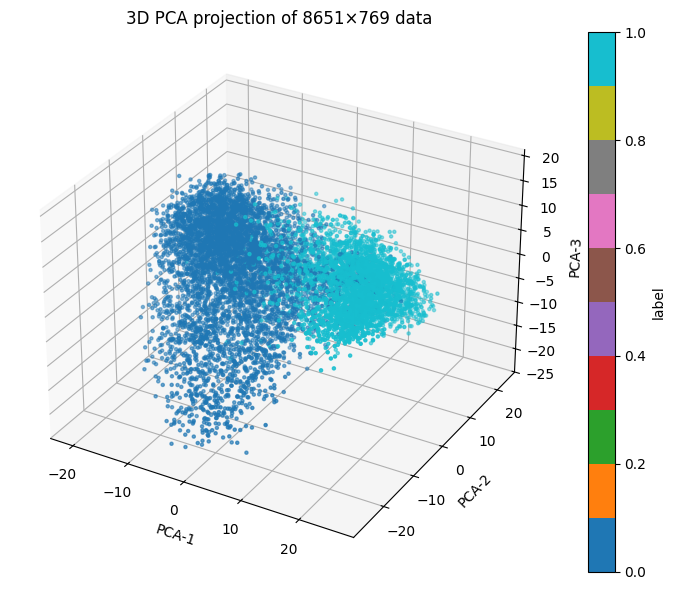

In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df.values
x_scaled = StandardScaler().fit_transform(x)

pca = PCA(n_components=3, random_state=0)
x_pca = pca.fit_transform(x_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

if "y" in globals():
    sc = ax.scatter(
        x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
        c=y2, s=5, cmap="tab10"
    )
    plt.colorbar(sc, ax=ax, label="label")
else:
    ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],
               s=5, alpha=0.6)

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("PCA-3")
ax.set_title("3D PCA projection of 8651×769 data")

plt.tight_layout()
plt.show()